In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

## ML applied on the CD-HIT dataset

#### Pre-Processing (if required)

In [2]:
df_cdhit = pd.read_csv('PhageAcr_ML_dataset_cdhit.csv')             # Read dataset
df_cdhit.set_index('ID', inplace=True)                              # Set the "ID" column as the index
df_cdhit = df_cdhit.rename(columns={'Protein Acr': 'Protein_Acr'})  # Renaming columns to avoid issues later
df_cdhit

,Size,Protein_Acr,length,charge,chargedensity,formulaC,formulaH,formulaN,formulaO,formulaS,...,IsoelectricPoint,Instability_index,SecStruct_helix,SecStruct_turn,SecStruct_sheet,Molar_extinction_coefficient_reduced,Molar_extinction_coefficient_oxidized,aliphatic_index,bomanindex,hydrophobic_ratio
ID,,,,,,,,,,,,,,,,,,,,,
RGB60049.1,105,1,105.0,-2.901,-0.000240,539,826,136,171,3,...,4.980767,34.719048,0.266667,0.323810,0.390476,14440,14440,82.666667,1.931333,0.361905
WP_103240931.1,195,1,195.0,-17.844,-0.000784,1004,1492,274,310,11,...,4.608869,34.520000,0.343590,0.282051,0.307692,50420,50670,67.538462,2.295333,0.343590
WP_086652143.1,179,1,179.0,-20.646,-0.001021,888,1361,223,299,7,...,4.386572,54.459832,0.402235,0.217877,0.346369,25900,25900,81.899441,1.828212,0.391061
WP_012242545.1,144,1,144.0,-0.834,-0.000050,757,1149,189,232,4,...,6.289712,33.052083,0.291667,0.291667,0.402778,41940,42065,82.430556,1.778750,0.319444
WP_062681378.1,150,1,150.0,-19.684,-0.001198,721,1113,185,244,3,...,4.110619,34.327400,0.340000,0.286667,0.373333,11460,11460,98.333333,1.572533,0.426667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WP_062067772.1,401,0,401.0,-14.370,-0.000335,1863,2959,523,613,7,...,4.910912,32.287531,0.329177,0.301746,0.344140,23950,23950,88.703242,1.646185,0.401496
SLM15270.1,393,0,393.0,-5.847,-0.000137,1885,2921,495,596,10,...,5.280195,24.271781,0.356234,0.295165,0.338422,66350,66350,83.027990,1.350254,0.384224
QBP32413.1,148,0,148.0,-5.560,-0.000323,762,1129,203,236,5,...,5.339023,50.092568,0.304054,0.277027,0.317568,37470,37470,66.621622,2.074730,0.317568


In [3]:
df_cdhit.isna().sum() # Check if any of the columns have missing values

Size                                     0
Protein_Acr                              0
length                                   0
charge                                   0
chargedensity                            0
formulaC                                 0
formulaH                                 0
formulaN                                 0
formulaO                                 0
formulaS                                 0
tot                                      0
hydrogen                                 0
single                                   0
double                                   0
MW_modlamp                               0
Gravy                                    0
Aromacity                                0
IsoelectricPoint                         0
Instability_index                        0
SecStruct_helix                          0
SecStruct_turn                           0
SecStruct_sheet                          0
Molar_extinction_coefficient_reduced     0
Molar_extin

In [4]:
df_cdhit.info() # Check column types

<class 'pandas.core.frame.DataFrame'>
Index: 2244 entries, RGB60049.1 to WP_115134678.1
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Size                                   2244 non-null   int64  
 1   Protein_Acr                            2244 non-null   int64  
 2   length                                 2244 non-null   float64
 3   charge                                 2244 non-null   float64
 4   chargedensity                          2244 non-null   float64
 5   formulaC                               2244 non-null   int64  
 6   formulaH                               2244 non-null   int64  
 7   formulaN                               2244 non-null   int64  
 8   formulaO                               2244 non-null   int64  
 9   formulaS                               2244 non-null   int64  
 10  tot                                    2244 non-null   int

In [5]:
df_cdhit.describe(include='all') # Check statistics

,Size,Protein_Acr,length,charge,chargedensity,formulaC,formulaH,formulaN,formulaO,formulaS,...,IsoelectricPoint,Instability_index,SecStruct_helix,SecStruct_turn,SecStruct_sheet,Molar_extinction_coefficient_reduced,Molar_extinction_coefficient_oxidized,aliphatic_index,bomanindex,hydrophobic_ratio
count,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.00000,2244.000000,2244.000000,...,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000
mean,248.300357,0.500000,248.285651,-6.695414,-0.000281,1207.989305,1879.772282,322.16533,385.962567,7.806150,...,5.690712,35.810279,0.332967,0.280577,0.357714,33603.582888,33688.865865,82.435960,1.658216,0.369782
std,208.633295,0.500111,208.636828,8.781504,0.000395,986.690577,1540.050501,268.71012,322.866032,5.473915,...,1.466920,11.360295,0.046547,0.041249,0.041236,30149.425986,30194.601234,11.294466,0.494860,0.038141
min,47.000000,0.000000,47.000000,-74.624000,-0.001981,235.000000,360.000000,58.00000,71.000000,1.000000,...,4.050028,-2.384375,0.165385,0.116883,0.206207,0.000000,0.000000,37.142857,-0.806250,0.216710
25%,104.750000,0.000000,104.750000,-10.024000,-0.000429,525.750000,830.750000,137.00000,165.000000,4.000000,...,4.767990,28.275842,0.303671,0.255749,0.329985,14325.000000,14440.000000,75.079858,1.318027,0.344812
50%,153.500000,0.500000,153.000000,-5.097500,-0.000233,761.500000,1171.000000,199.00000,245.000000,6.000000,...,5.199029,35.359914,0.333333,0.283019,0.354558,24980.000000,24980.000000,82.417967,1.645809,0.368421
75%,390.000000,1.000000,390.000000,-1.700750,-0.000079,1878.250000,2960.250000,505.25000,602.250000,10.000000,...,6.024686,42.808464,0.360825,0.307049,0.383035,44920.000000,45060.000000,89.369103,1.992966,0.392523
max,3601.000000,1.000000,3601.000000,56.510000,0.001504,17275.000000,26813.000000,4587.00000,5679.000000,65.000000,...,11.800051,83.681429,0.506494,0.546816,0.528846,601510.000000,602635.000000,142.403846,4.079714,0.622120


## Preparing training, testing and validation sets

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Extracting features (X) and target variable (y)
X = df_cdhit.drop('Protein_Acr', axis=1)    # Keep only the features in variable x
y = df_cdhit['Protein_Acr']                 # Assign our Target variable as y

# Split the dataset into training+validation (80%) and test sets (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # random_state will allow for the reproductibility of the split

# Split the training+validation set into training (70%) and validation sets (10% of the original data)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)

# Checking the shape of the resulting sets
print(f'Training Set \t Shape of X_train: {X_train.shape} \n\t\t Shape of y_train: {y_train.shape} \n')
print(f'Validation Set \t Shape of X_val: {X_val.shape} \n\t\t Shape of y_val: {y_val.shape} \n')
print(f'Test Set \t Shape of X_test: {X_test.shape} \n\t\t Shape of y_test: {y_test.shape}')

Training Set 	 Shape of X_train: (1570, 26) 
		 Shape of y_train: (1570,) 

Validation Set 	 Shape of X_val: (225, 26) 
		 Shape of y_val: (225,) 

Test Set 	 Shape of X_test: (449, 26) 
		 Shape of y_test: (449,)


## Unsupervised Learning

### Principal Component Analysis (PCA)

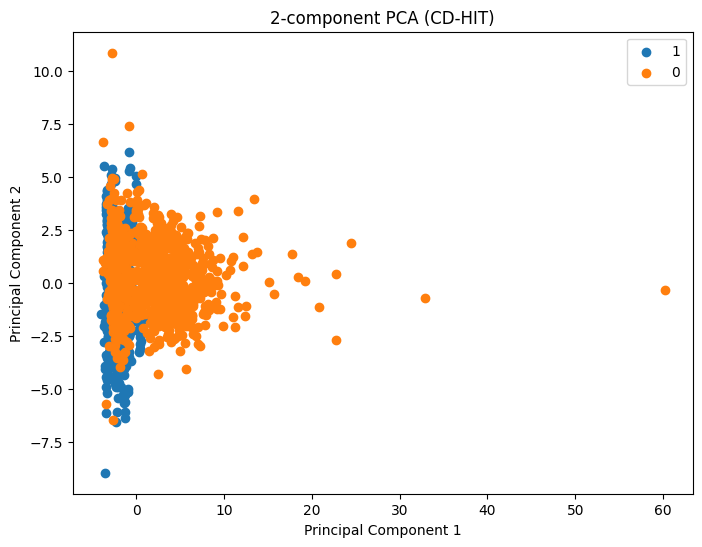

In [7]:
## PCA before running data through a ML model
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Protein_Acr'] = y.values

# Plotting the PCA results
plt.figure(figsize=(8, 6))
for protein in pca_df['Protein_Acr'].unique():
    indices = pca_df['Protein_Acr'] == protein
    plt.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], label=protein)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2-component PCA (CD-HIT)')
plt.legend()
plt.show()

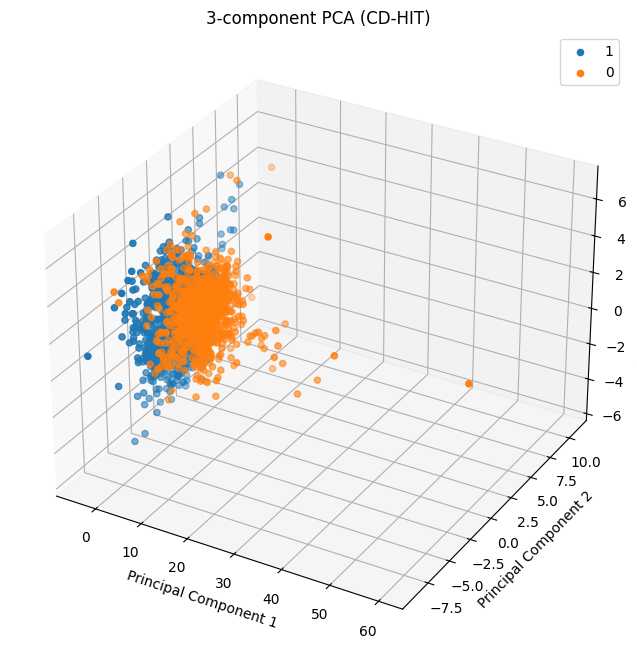

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['Protein_Acr'] = y.values

# Plotting the PCA results in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for protein in pca_df['Protein_Acr'].unique():
    indices = pca_df['Protein_Acr'] == protein
    ax.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], pca_df.loc[indices, 'PC3'], label=protein)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3-component PCA (CD-HIT)')
ax.legend()
plt.show()

### k-means Clustering

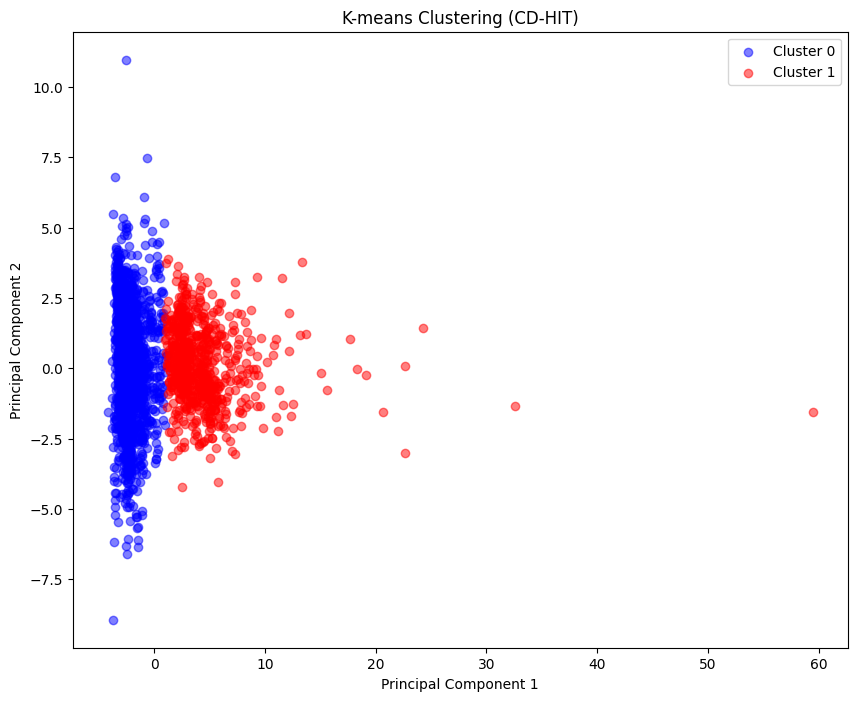

In [9]:
from sklearn.cluster import KMeans

# Preprocess the data if needed (scaling, handling missing values)
scaler = StandardScaler()
df_cdhit_scaled = scaler.fit_transform(df_cdhit)

# Apply K-means algorithm
k = 2       # We want to distinguish between positive and negative based on 'Protein_Acr' (0 vs 1)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_cdhit_scaled)

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_cdhit_scaled)

# Plot the clusters
plt.figure(figsize=(10, 8))
colors = ['blue', 'red']
for i in range(k):
    plt.scatter(pca_result[kmeans.labels_ == i, 0], pca_result[kmeans.labels_ == i, 1], label=f'Cluster {i}', c=colors[i], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering (CD-HIT)')
plt.legend()
plt.show()

### t-SNE

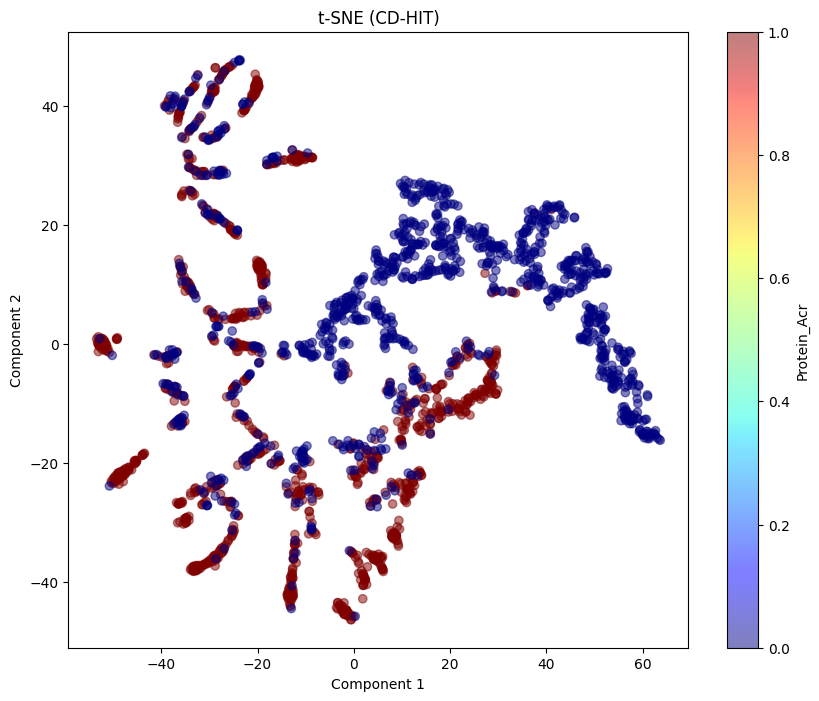

In [10]:
from sklearn.manifold import TSNE

# Initialize t-SNE object
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.jet, alpha=0.5)  # Adjust cmap for better visualization
plt.colorbar(label='Protein_Acr')  # Add colorbar for class labels
plt.title('t-SNE (CD-HIT)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# Running data through ML models

#### Decision Tree Model

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model using the training data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Decision Tree Validation Results:
Accuracy: 0.87
Precision: 0.80
Recall: 0.88
F1-Score: 0.84


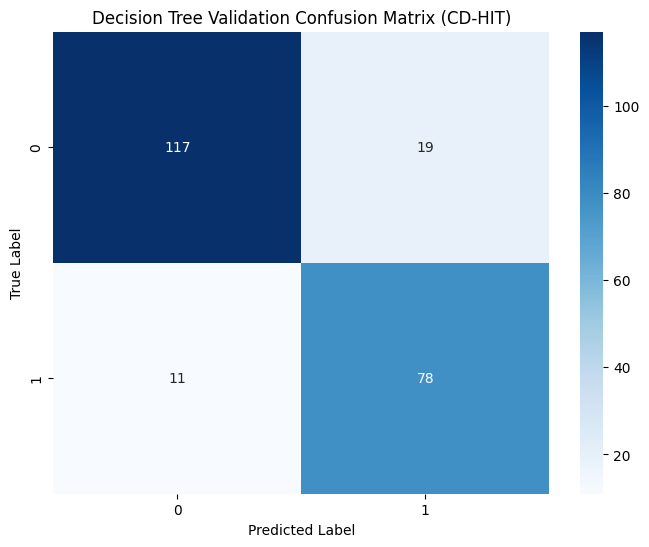

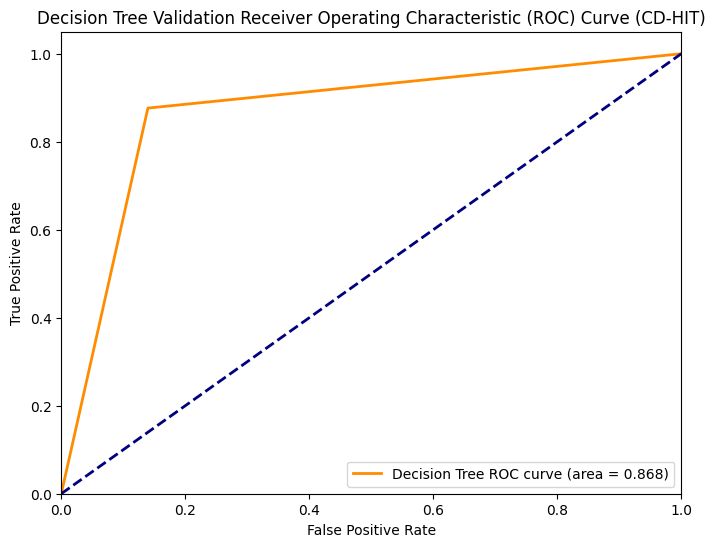

In [12]:
# Make predictions on the validation set for Decision Tree
y_val_pred_prob_dt = dt_model.predict_proba(X_val)[:, 1]  # Obtain probability estimates

# Convert probabilities to binary class labels using a threshold of 0.5
y_val_pred_dt = (y_val_pred_prob_dt >= 0.5).astype(int)

# Calculate evaluation metrics for the validation set
val_accuracy_dt = accuracy_score(y_val, y_val_pred_dt)
val_precision_dt = precision_score(y_val, y_val_pred_dt)
val_recall_dt = recall_score(y_val, y_val_pred_dt)
val_f1_dt = f1_score(y_val, y_val_pred_dt)

# Print the evaluation metrics for Decision Tree
print("Decision Tree Validation Results:")
print(f"Accuracy: {val_accuracy_dt:.2f}")
print(f"Precision: {val_precision_dt:.2f}")
print(f"Recall: {val_recall_dt:.2f}")
print(f"F1-Score: {val_f1_dt:.2f}")

### Confusion Matrix
# Generate the confusion matrix for the validation set
val_conf_matrix = confusion_matrix(y_val, y_val_pred_dt)

# Plot the confusion matrix for the validation set
plt.figure(figsize=(8, 6))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Validation Confusion Matrix (CD-HIT)')
plt.show()

### ROC Curve and AUC
# Calculate ROC curve and AUC for the validation set using probability predictions
val_fpr_dt, val_tpr_dt, thresholds = roc_curve(y_val, y_val_pred_prob_dt)
val_roc_auc_dt = auc(val_fpr_dt, val_tpr_dt)

# Plot ROC curve for the validation set
plt.figure(figsize=(8, 6))
plt.plot(val_fpr_dt, val_tpr_dt, color='darkorange', lw=2, label=f'Decision Tree ROC curve (area = {val_roc_auc_dt:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Validation Receiver Operating Characteristic (ROC) Curve (CD-HIT)')
plt.legend(loc='lower right')
plt.show()

Decision Tree Test Results:
Test Accuracy: 0.87
Test Precision: 0.88
Test Recall: 0.85
Test F1-Score: 0.87


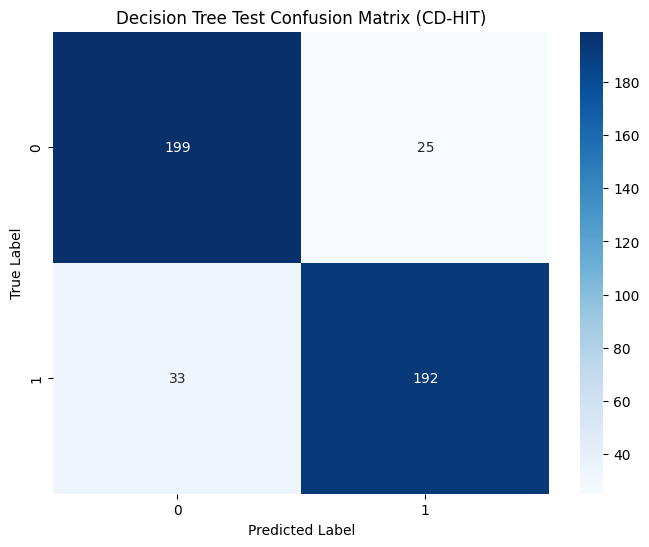

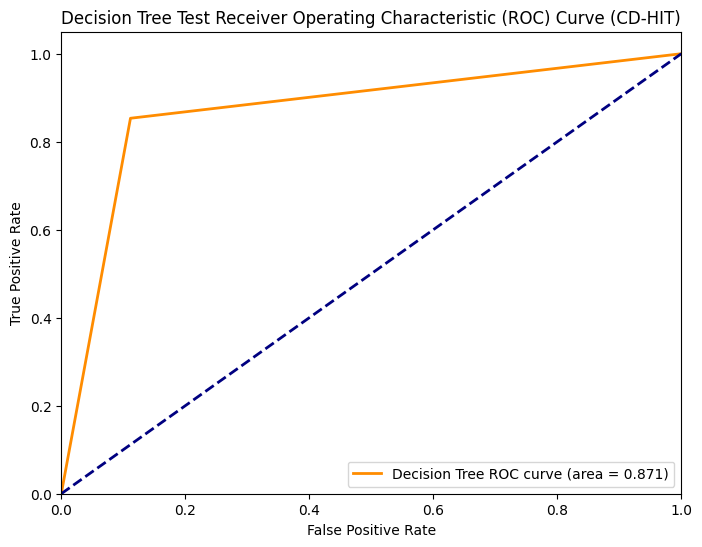

In [13]:
# Make probability predictions on the test set for Decision Tree
y_test_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]  # Obtain probability estimates

# Convert probabilities to binary class labels using a threshold of 0.5
y_test_pred_dt = (y_test_pred_prob_dt >= 0.5).astype(int)

# Calculate accuracy, precision, recall, and f1-score for the test set
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
test_precision_dt = precision_score(y_test, y_test_pred_dt)
test_recall_dt = recall_score(y_test, y_test_pred_dt)
test_f1_dt = f1_score(y_test, y_test_pred_dt)

print("Decision Tree Test Results:")
print(f"Test Accuracy: {test_accuracy_dt:.2f}")
print(f"Test Precision: {test_precision_dt:.2f}")
print(f"Test Recall: {test_recall_dt:.2f}")
print(f"Test F1-Score: {test_f1_dt:.2f}")

### Confusion Matrix
# Generate the confusion matrix for the test set
test_conf_matrix = confusion_matrix(y_test, y_test_pred_dt)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Test Confusion Matrix (CD-HIT)')
plt.show()

### ROC Curve and AUC
# Calculate ROC curve and AUC for the test set using probability predictions
test_fpr_dt, test_tpr_dt, thresholds = roc_curve(y_test, y_test_pred_prob_dt)

# Calculate the area under the ROC curve (AUC) for Decision Tree
test_roc_auc_dt = auc(test_fpr_dt, test_tpr_dt)

# Plot ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(test_fpr_dt, test_tpr_dt, color='darkorange', lw=2, label=f'Decision Tree ROC curve (area = {test_roc_auc_dt:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Test Receiver Operating Characteristic (ROC) Curve (CD-HIT)')
plt.legend(loc='lower right')
plt.show()

#### RandomForest Model

Compared to Decision Tree, RandomForest performed better on both validation and test sets, especially in terms of recall and F1-Score. This improvement is due to the ensemble approach of RandomForest, which mitigates overfitting and leverages the strengths of multiple trees.

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Random Forest Validation Results:
Validation Accuracy: 0.89
Validation Precision: 0.80
Validation Recall: 0.98
Validation F1-Score: 0.88


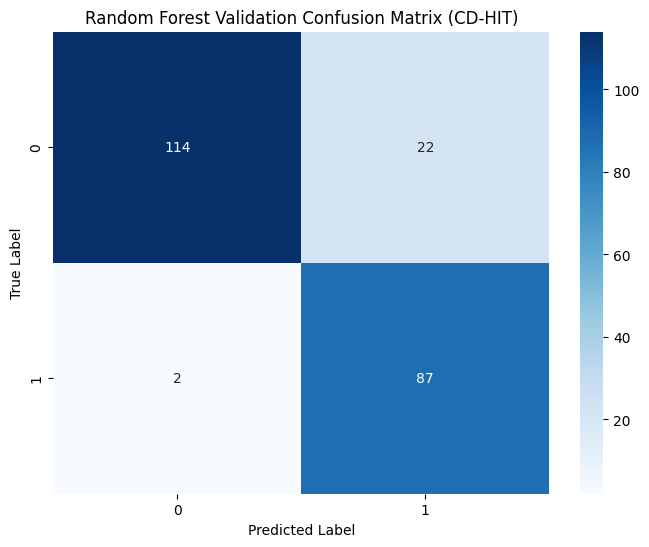

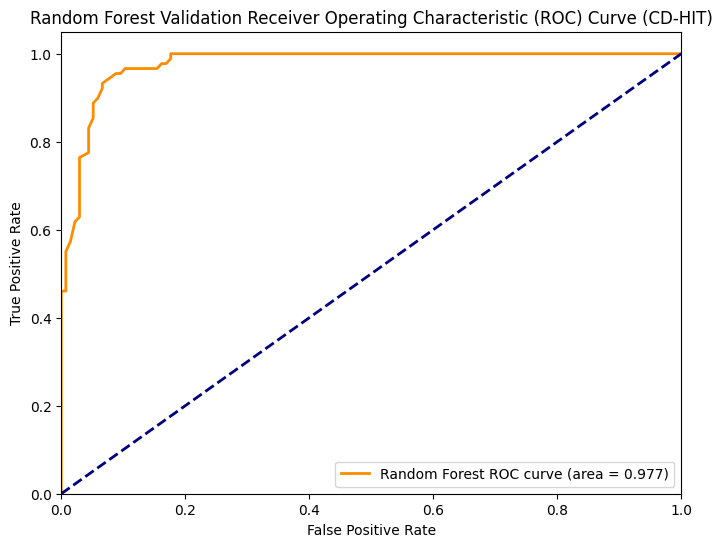

In [15]:
# Make predictions on the validation set for Random Forest and obtain probability estimates
y_val_pred_prob_rf = rf_model.predict_proba(X_val)[:, 1]  # Select probabilities for the positive class

# Convert probabilities to binary class labels using a threshold of 0.5
y_val_pred_rf = (y_val_pred_prob_rf >= 0.5).astype(int)

# Calculate accuracy, precision, recall, and f1-score for the validation set
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
val_precision_rf = precision_score(y_val, y_val_pred_rf)
val_recall_rf = recall_score(y_val, y_val_pred_rf)
val_f1_rf = f1_score(y_val, y_val_pred_rf)

# Print the performance metrics
print("Random Forest Validation Results:")
print(f"Validation Accuracy: {val_accuracy_rf:.2f}")
print(f"Validation Precision: {val_precision_rf:.2f}")
print(f"Validation Recall: {val_recall_rf:.2f}")
print(f"Validation F1-Score: {val_f1_rf:.2f}")

# Generate the confusion matrix for the validation set
val_conf_matrix = confusion_matrix(y_val, y_val_pred_rf)

# Plot the confusion matrix for the validation set
plt.figure(figsize=(8, 6))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Validation Confusion Matrix (CD-HIT)')
plt.show()

## ROC Curve and AUC
# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds for Random Forest
val_fpr_rf, val_tpr_rf, thresholds = roc_curve(y_val, y_val_pred_prob_rf)

# Calculate the area under the ROC curve (AUC) for Random Forest
val_roc_auc_rf = auc(val_fpr_rf, val_tpr_rf)

# Plot ROC curve for the validation set
plt.figure(figsize=(8, 6))
plt.plot(val_fpr_rf, val_tpr_rf, color='darkorange', lw=2, label=f'Random Forest ROC curve (area = {val_roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Validation Receiver Operating Characteristic (ROC) Curve (CD-HIT)')
plt.legend(loc='lower right')
plt.show()

Random Forest Test Results:
Test Accuracy: 0.94
Test Precision: 0.90
Test Recall: 0.97
Test F1-Score: 0.94


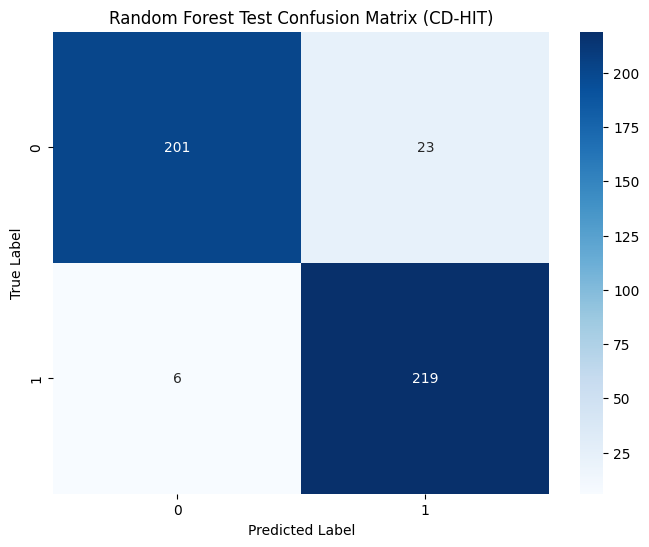

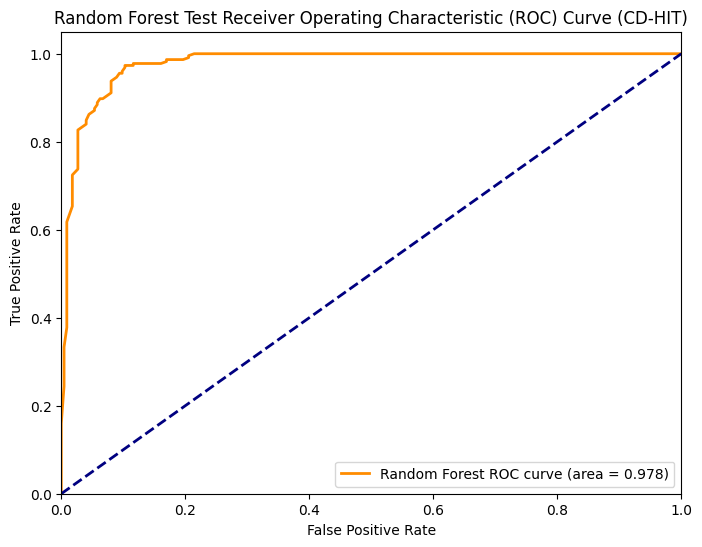

In [16]:
# Make binary predictions on the test set for Random Forest
y_test_pred_rf = rf_model.predict(X_test)

# Calculate accuracy, precision, recall, and f1-score for the test set
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf)
test_recall_rf = recall_score(y_test, y_test_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf)

print("Random Forest Test Results:")
print(f"Test Accuracy: {test_accuracy_rf:.2f}")
print(f"Test Precision: {test_precision_rf:.2f}")
print(f"Test Recall: {test_recall_rf:.2f}")
print(f"Test F1-Score: {test_f1_rf:.2f}")

### Confusion Matrix
# Generate the confusion matrix for the test set
test_conf_matrix = confusion_matrix(y_test, y_test_pred_rf)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Test Confusion Matrix (CD-HIT)')
plt.show()

### ROC Curve and AUC
# Make probability predictions on the test set for Random Forest
y_test_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Obtain probability estimates

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds for Random Forest
test_fpr_rf, test_tpr_rf, thresholds = roc_curve(y_test, y_test_pred_prob_rf)

# Calculate the area under the ROC curve (AUC) for Random Forest
test_roc_auc_rf = auc(test_fpr_rf, test_tpr_rf)

# Plot ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(test_fpr_rf, test_tpr_rf, color='darkorange', lw=2, label=f'Random Forest ROC curve (area = {test_roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Test Receiver Operating Characteristic (ROC) Curve (CD-HIT)')
plt.legend(loc='lower right')
plt.show()

#### SVM Model
The SVM model achieved lower accuracy and precision compared to the RandomForest model, but it has higher recall. This indicates that the SVM model is more sensitive to positive instances but might have more false positives.

The high recall score in both the validation and test sets indicates that the SVM model effectively identifies positive instances. It correctly identifies nearly all actual positive cases while keeping false negatives low.

The moderate precision score suggests that the model has a tendency to classify some negative instances as positive, leading to false positives. This is reflected in the confusion matrices with a non-zero count of false positives.

In [17]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model using the training data
svm_model.fit(X_train, y_train)

SVC(random_state=42)

SVM Validation Results:
Validation Accuracy: 0.80
Validation Precision: 0.66
Validation Recall: 1.00
Validation F1-Score: 0.80


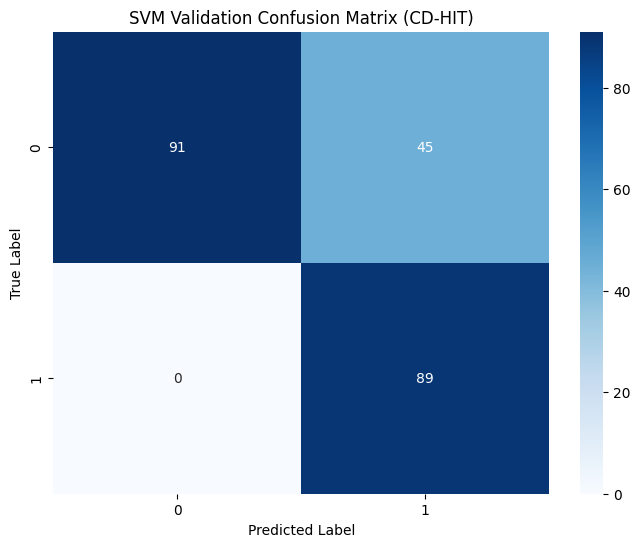

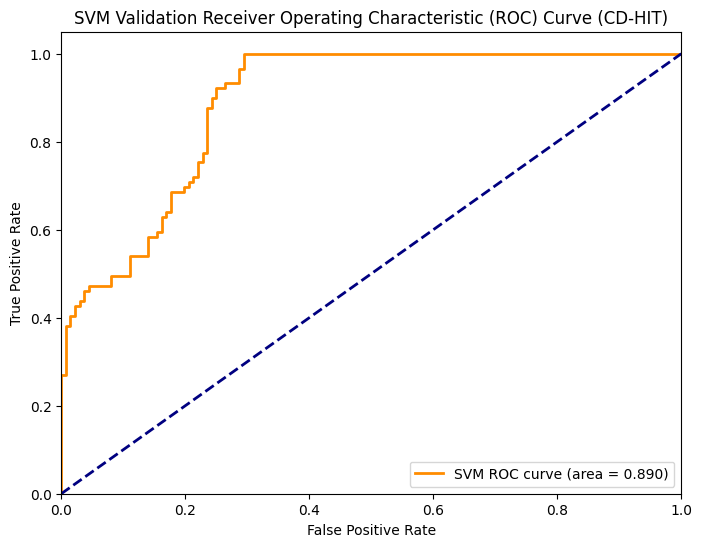

In [18]:
# Make predictions on the validation set
y_val_pred_svm = svm_model.predict(X_val)

# Calculate accuracy, precision, recall, and f1-score for the validation set
val_accuracy_svm = accuracy_score(y_val, y_val_pred_svm)
val_precision_svm = precision_score(y_val, y_val_pred_svm)
val_recall_svm = recall_score(y_val, y_val_pred_svm)
val_f1_svm = f1_score(y_val, y_val_pred_svm)

print("SVM Validation Results:")
print(f"Validation Accuracy: {val_accuracy_svm:.2f}")
print(f"Validation Precision: {val_precision_svm:.2f}")
print(f"Validation Recall: {val_recall_svm:.2f}")
print(f"Validation F1-Score: {val_f1_svm:.2f}")

### Confusion Matrix
# Generate the confusion matrix for the validation set
val_conf_matrix = confusion_matrix(y_val, y_val_pred_svm)

# Plot the confusion matrix for the validation set
plt.figure(figsize=(8, 6))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Validation Confusion Matrix (CD-HIT)')
plt.show()

### ROC Curve and AUC
# Make predictions on the validation set using decision_function
y_val_scores_svm = svm_model.decision_function(X_val)

# Calculate ROC curve and AUC for the validation set
val_fpr_svm, val_tpr_svm, thresholds = roc_curve(y_val, y_val_scores_svm)
val_roc_auc_svm = auc(val_fpr_svm, val_tpr_svm)

# Plot ROC curve for the validation set
plt.figure(figsize=(8, 6))
plt.plot(val_fpr_svm, val_tpr_svm, color='darkorange', lw=2, label=f'SVM ROC curve (area = {val_roc_auc_svm:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Validation Receiver Operating Characteristic (ROC) Curve (CD-HIT)')
plt.legend(loc='lower right')
plt.show()

SVM Test Results:
Test Accuracy: 0.85
Test Precision: 0.78
Test Recall: 0.99
Test F1-Score: 0.87


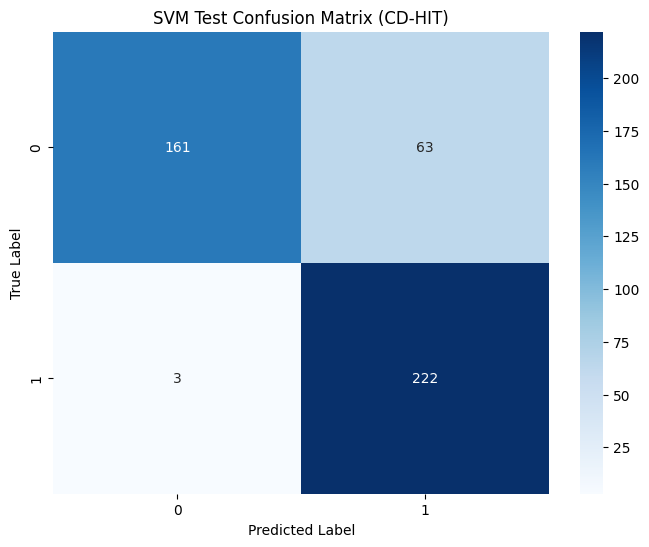

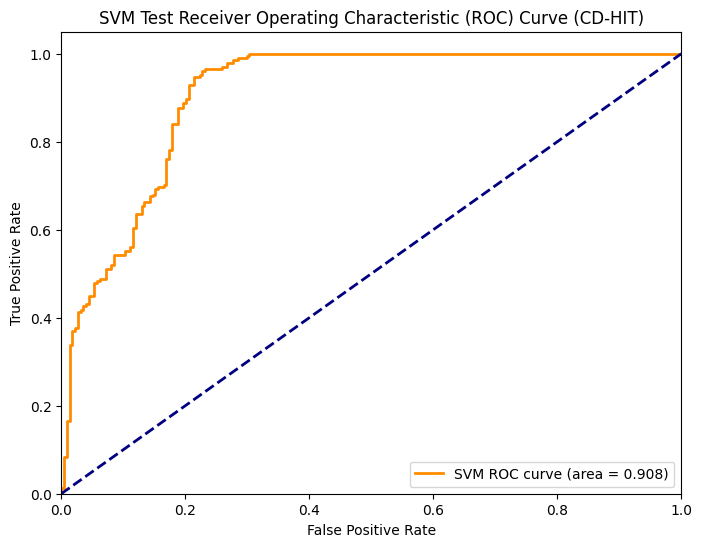

In [19]:
# Make predictions on the test set
y_test_pred_svm = svm_model.predict(X_test)

# Calculate accuracy, precision, recall, and f1-score for the test set
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
test_precision_svm = precision_score(y_test, y_test_pred_svm)
test_recall_svm = recall_score(y_test, y_test_pred_svm)
test_f1_svm = f1_score(y_test, y_test_pred_svm)

print("SVM Test Results:")
print(f"Test Accuracy: {test_accuracy_svm:.2f}")
print(f"Test Precision: {test_precision_svm:.2f}")
print(f"Test Recall: {test_recall_svm:.2f}")
print(f"Test F1-Score: {test_f1_svm:.2f}")

### Confusion Matrix
# Generate the confusion matrix for the test set
test_conf_matrix = confusion_matrix(y_test, y_test_pred_svm)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Test Confusion Matrix (CD-HIT)')
plt.show()

### ROC Curve and AUC
# Make predictions on the test set using decision_function
y_test_scores_svm = svm_model.decision_function(X_test)

# Calculate ROC curve and AUC for the test set
test_fpr_svm, test_tpr_svm, thresholds = roc_curve(y_test, y_test_scores_svm)
test_roc_auc_svm = auc(test_fpr_svm, test_tpr_svm)

# Plot ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(test_fpr_svm, test_tpr_svm, color='darkorange', lw=2, label=f'SVM ROC curve (area = {test_roc_auc_svm:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Test Receiver Operating Characteristic (ROC) Curve (CD-HIT)')
plt.legend(loc='lower right')
plt.show()

#### XGBoost Model
The XGBoost model performs similarly to the RandomForest model, with high accuracy and strong precision and recall on both validation and test sets. The XGBoost model demonstrates robust performance across different evaluation metrics.

In [20]:
import xgboost as xgb
from xgboost import XGBClassifier

# Initialize the SVM classifier
xgb_model = XGBClassifier(random_state=42)

# Train the model using the training data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

XGBoost Validation Results:
Validation Accuracy: 0.90
Validation Precision: 0.82
Validation Recall: 0.97
Validation F1-Score: 0.89


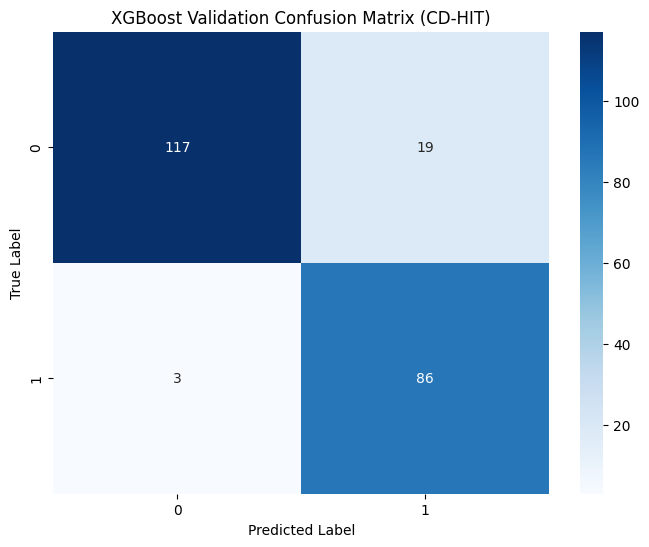

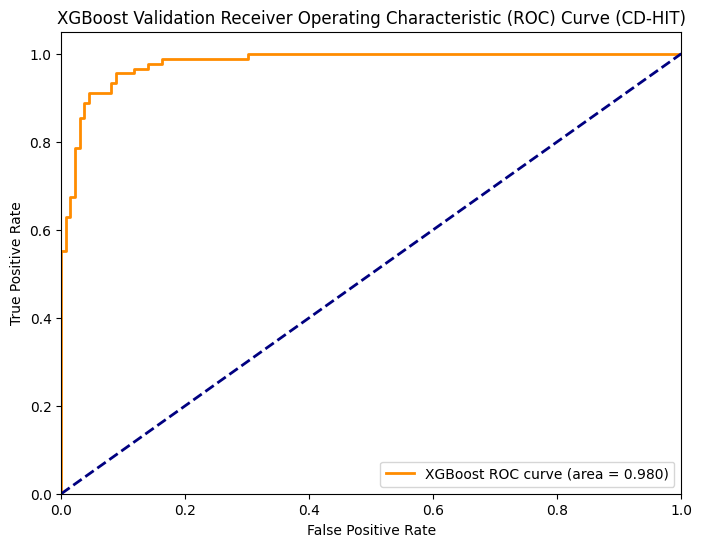

In [21]:
# Make predictions on the validation set
y_val_pred_xgb = xgb_model.predict(X_val)

# Convert predictions to binary format
y_val_pred_binary = [1 if p >= 0.5 else 0 for p in y_val_pred_xgb]

# Calculate evaluation metrics
val_accuracy_xgb = accuracy_score(y_val, y_val_pred_binary)
val_precision_xgb = precision_score(y_val, y_val_pred_binary)
val_recall_xgb = recall_score(y_val, y_val_pred_binary)
val_f1_xgb = f1_score(y_val, y_val_pred_binary)

print("XGBoost Validation Results:")
print(f"Validation Accuracy: {val_accuracy_xgb:.2f}")
print(f"Validation Precision: {val_precision_xgb:.2f}")
print(f"Validation Recall: {val_recall_xgb:.2f}")
print(f"Validation F1-Score: {val_f1_xgb:.2f}")

### Confusion Matrix
# Generate the confusion matrix for the validation set
val_conf_matrix = confusion_matrix(y_val, y_val_pred_binary)

# Plot the confusion matrix for the validation set
plt.figure(figsize=(8, 6))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost Validation Confusion Matrix (CD-HIT)')
plt.show()

### ROC Curve and AUC
# Calculate ROC curve and AUC for the validation set
y_val_pred_prob = xgb_model.predict_proba(X_val)[:, 1]                      # Calculate the predicted probabilities for the validation set
val_fpr_xgb, val_tpr_xgb, thresholds = roc_curve(y_val, y_val_pred_prob)    # Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds for the validation set
val_roc_auc_xgb = auc(val_fpr_xgb, val_tpr_xgb)                             # Calculate the area under the ROC curve (AUC) for the validation set

# Plot the ROC curve for the validation set
plt.figure(figsize=(8, 6))
plt.plot(val_fpr_xgb, val_tpr_xgb, color='darkorange', lw=2, label=f'XGBoost ROC curve (area = {val_roc_auc_xgb:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Validation Receiver Operating Characteristic (ROC) Curve (CD-HIT)')
plt.legend(loc='lower right')
plt.show()

XGBoost Test Results:
Test Accuracy: 0.92
Test Precision: 0.90
Test Recall: 0.95
Test F1-Score: 0.92


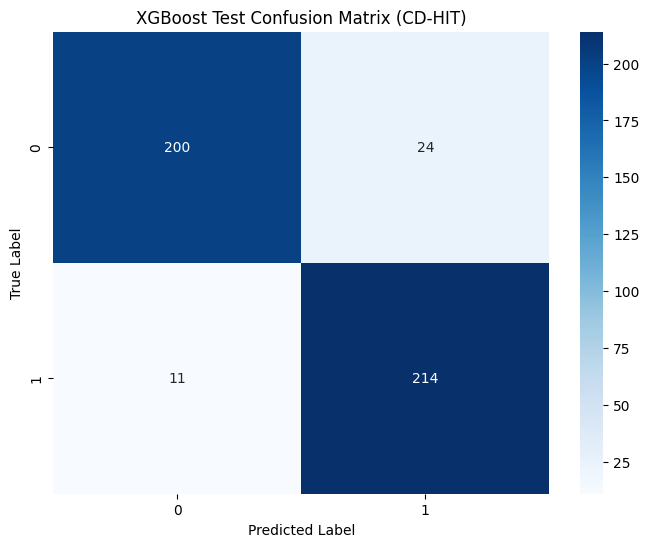

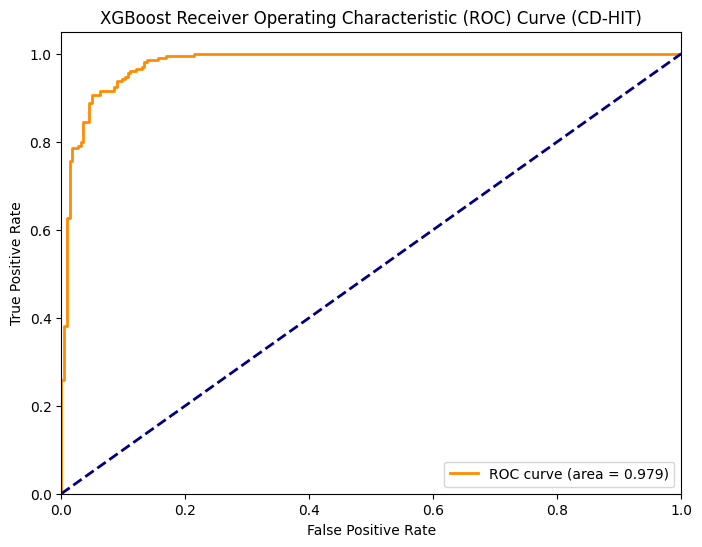

In [22]:
# Make predictions on the test set
y_test_pred_xgb = xgb_model.predict(X_test)
y_test_pred_binary = [1 if p >= 0.5 else 0 for p in y_test_pred_xgb]

# Calculate evaluation metrics
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_binary)
test_precision_xgb = precision_score(y_test, y_test_pred_binary)
test_recall_xgb = recall_score(y_test, y_test_pred_binary)
test_f1_xgb = f1_score(y_test, y_test_pred_binary)

print("XGBoost Test Results:")
print(f"Test Accuracy: {test_accuracy_xgb:.2f}")
print(f"Test Precision: {test_precision_xgb:.2f}")
print(f"Test Recall: {test_recall_xgb:.2f}")
print(f"Test F1-Score: {test_f1_xgb:.2f}")

### Confusion Matrix
# Generate the confusion matrix for the test set
test_conf_matrix = confusion_matrix(y_test, y_test_pred_binary)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost Test Confusion Matrix (CD-HIT)')
plt.show()

### ROC Curve and AUC
# Calculate predicted probabilities for the test set
y_test_pred_prob = xgb_model.predict_proba(X_test)[:, 1]                      # Calculate the predicted probabilities for the test set
test_fpr_xgb, test_tpr_xgb, thresholds = roc_curve(y_test, y_test_pred_prob)    # Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds for the test set
test_roc_auc_xgb = auc(test_fpr_xgb, test_tpr_xgb)                             # Calculate the area under the ROC curve (AUC) for the test set

# Plot the ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(test_fpr_xgb, test_tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {test_roc_auc_xgb:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Receiver Operating Characteristic (ROC) Curve (CD-HIT)')
plt.legend(loc='lower right')
plt.show()

## Combined Metrics

In [23]:
# Define evaluation metrics for validation set
validation_metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Decision Tree': [round(val_accuracy_dt, 2), round(val_precision_dt, 2), round(val_recall_dt, 2), round(val_f1_dt, 2)],
    'Random Forest': [round(val_accuracy_rf, 2), round(val_precision_rf, 2), round(val_recall_rf, 2), round(val_f1_rf, 2)],
    'SVM': [round(val_accuracy_svm, 2), round(val_precision_svm, 2), round(val_recall_svm, 2), round(val_f1_svm, 2)],
    'XGBoost': [round(val_accuracy_xgb, 2), round(val_precision_xgb, 2), round(val_recall_xgb, 2), round(val_f1_xgb, 2)]
}

# Define evaluation metrics for test set
test_metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Decision Tree': [round(test_accuracy_dt, 2), round(test_precision_dt, 2), round(test_recall_dt, 2), round(test_f1_dt, 2)],
    'Random Forest': [round(test_accuracy_rf, 2), round(test_precision_rf, 2), round(test_recall_rf, 2), round(test_f1_rf, 2)],
    'SVM': [round(test_accuracy_svm, 2), round(test_precision_svm, 2), round(test_recall_svm, 2), round(test_f1_svm, 2)],
    'XGBoost': [round(test_accuracy_xgb, 2), round(test_precision_xgb, 2), round(test_recall_xgb, 2), round(test_f1_xgb, 2)]
}

# Create DataFrames for Metrics comparisons between Models
validation_metrics_df = pd.DataFrame(validation_metrics)    # Create DataFrame for validation set
validation_metrics_df.set_index('Metric', inplace=True)     # Set 'Metric' column as index

test_metrics_df = pd.DataFrame(test_metrics)                # Create DataFrame for test set
test_metrics_df.set_index('Metric', inplace=True)           # Set 'Metric' column as index

In [24]:
# Display DataFrames
print("Validation Set Metrics:")
validation_metrics_df

Validation Set Metrics:


,Decision Tree,Random Forest,SVM,XGBoost
Metric,,,,
Accuracy,0.87,0.89,0.80,0.90
Precision,0.80,0.80,0.66,0.82
Recall,0.88,0.98,1.00,0.97
F1-Score,0.84,0.88,0.80,0.89


In [25]:
print("Test Set Metrics:")
test_metrics_df

Test Set Metrics:


,Decision Tree,Random Forest,SVM,XGBoost
Metric,,,,
Accuracy,0.87,0.94,0.85,0.92
Precision,0.88,0.90,0.78,0.90
Recall,0.85,0.97,0.99,0.95
F1-Score,0.87,0.94,0.87,0.92


## Combined ROC Curve plots

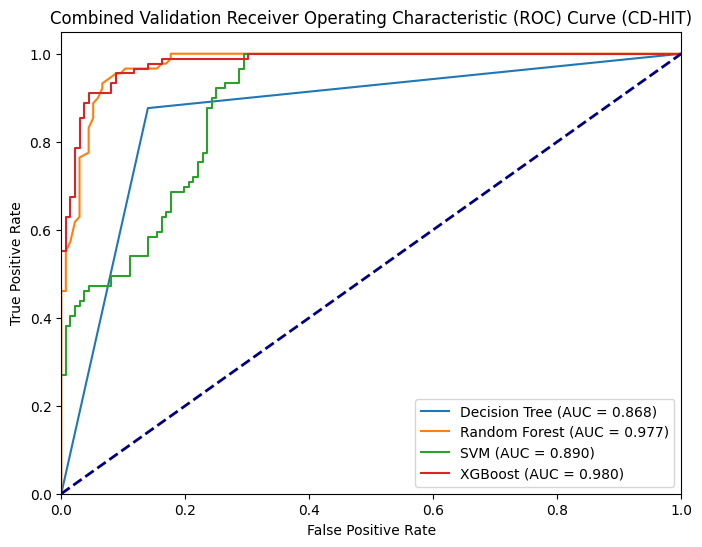

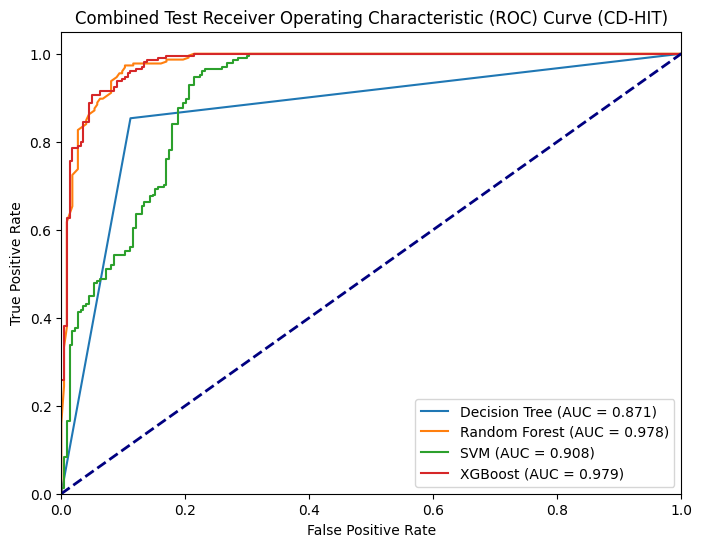

In [26]:
# Define models and their corresponding ROC curve data for the validation set
models_val = ['Decision Tree', 'Random Forest', 'SVM', 'XGBoost']
fprs_val = [val_fpr_dt, val_fpr_rf, val_fpr_svm, val_fpr_xgb]
tprs_val = [val_tpr_dt, val_tpr_rf, val_tpr_svm, val_tpr_xgb]
aucs_val = [val_roc_auc_dt, val_roc_auc_rf, val_roc_auc_svm, val_roc_auc_xgb]

# Define models and their corresponding ROC curve data for the test set
fprs_test = [test_fpr_dt, test_fpr_rf, test_fpr_svm, test_fpr_xgb]
tprs_test = [test_tpr_dt, test_tpr_rf, test_tpr_svm, test_tpr_xgb]
aucs_test = [test_roc_auc_dt, test_roc_auc_rf, test_roc_auc_svm, test_roc_auc_xgb]

# Plot combined ROC curves for the validation set
plt.figure(figsize=(8, 6))
for model, fpr, tpr, auc_val in zip(models_val, fprs_val, tprs_val, aucs_val):
    plt.plot(fpr, tpr, label=f'{model} (AUC = {auc_val:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined Validation Receiver Operating Characteristic (ROC) Curve (CD-HIT)')
plt.legend(loc='lower right')
plt.show()

# Plot combined ROC curves for the test set
plt.figure(figsize=(8, 6))
for model, fpr, tpr, auc_test in zip(models_val, fprs_test, tprs_test, aucs_test):
    plt.plot(fpr, tpr, label=f'{model} (AUC = {auc_test:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined Test Receiver Operating Characteristic (ROC) Curve (CD-HIT)')
plt.legend(loc='lower right')
plt.show()

## Combined Confusion Matrices

### Validation set Confusion Matrices

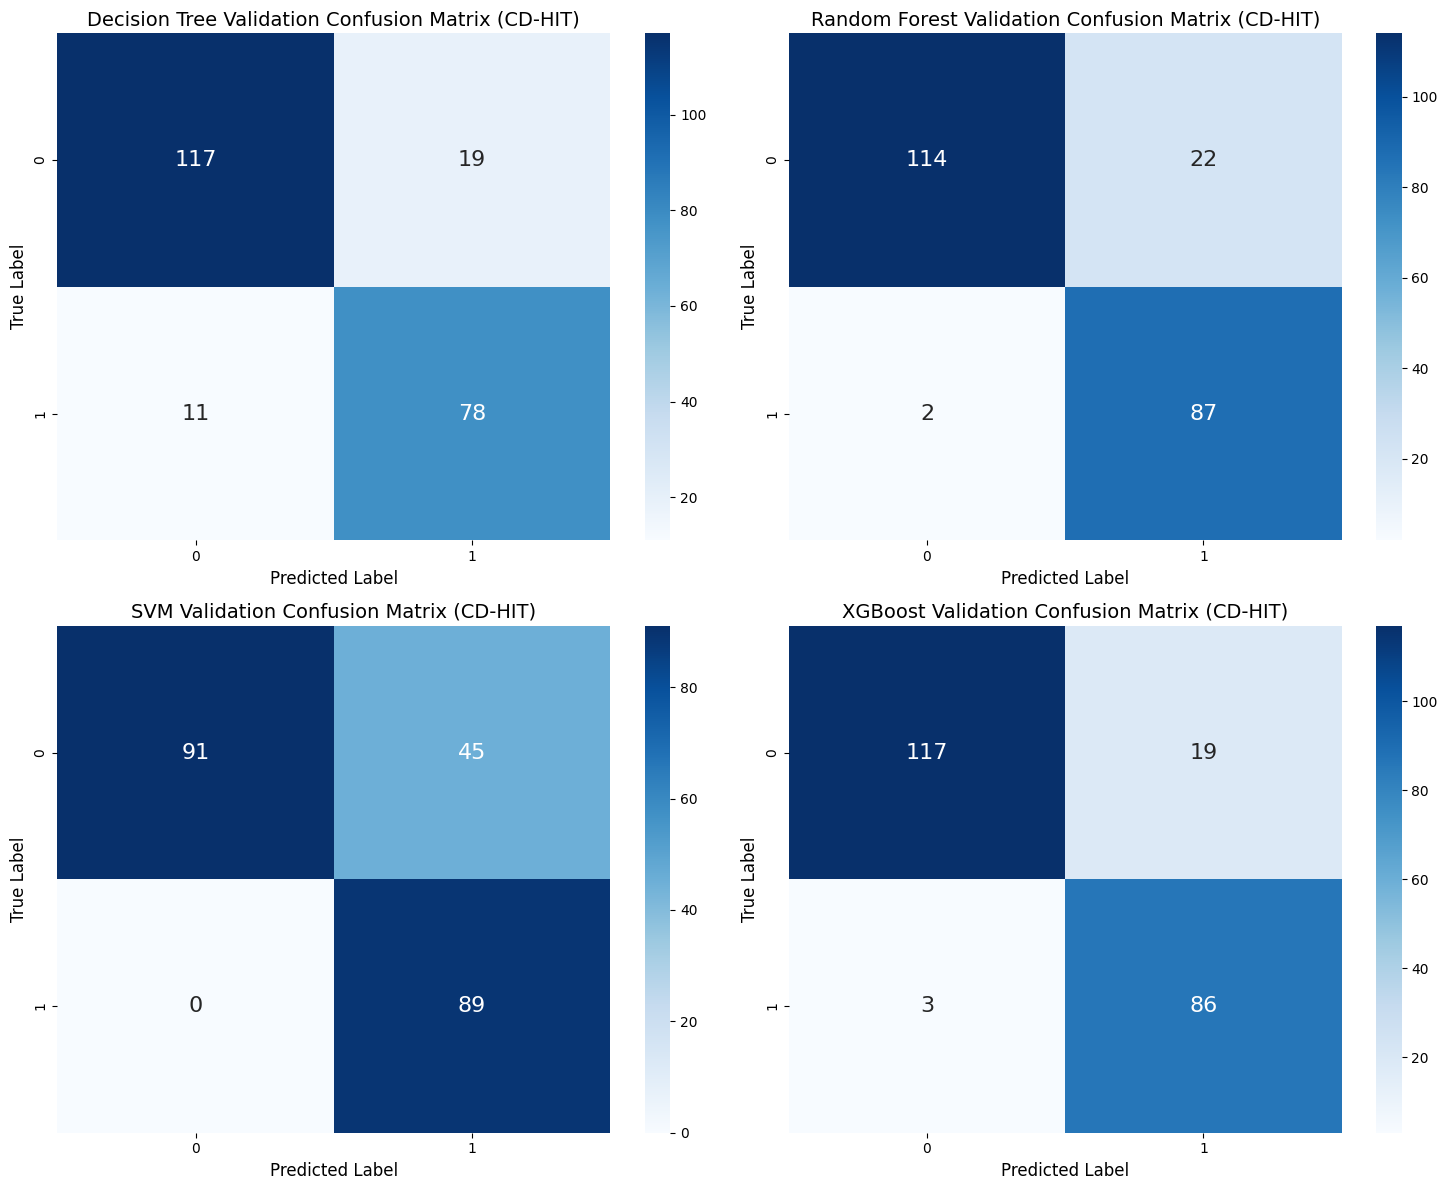

In [54]:
# Generate the confusion matrices
val_conf_matrix_dt = confusion_matrix(y_val, y_val_pred_dt)
val_conf_matrix_rf = confusion_matrix(y_val, y_val_pred_rf)
val_conf_matrix_svm = confusion_matrix(y_val, y_val_pred_svm)
val_conf_matrix_xgb = confusion_matrix(y_val, y_val_pred_binary)

# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot the confusion matrix for Decision Tree
sns.heatmap(val_conf_matrix_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0], annot_kws={"size": 16})
axes[0, 0].set_xlabel('Predicted Label', fontsize=12)
axes[0, 0].set_ylabel('True Label', fontsize=12)
axes[0, 0].set_title('Decision Tree Validation Confusion Matrix (CD-HIT)', fontsize=14)

# Plot the confusion matrix for Random Forest
sns.heatmap(val_conf_matrix_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1], annot_kws={"size": 16})
axes[0, 1].set_xlabel('Predicted Label', fontsize=12)
axes[0, 1].set_ylabel('True Label', fontsize=12)
axes[0, 1].set_title('Random Forest Validation Confusion Matrix (CD-HIT)', fontsize=14)

# Plot the confusion matrix for SVM
sns.heatmap(val_conf_matrix_svm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0], annot_kws={"size": 16})
axes[1, 0].set_xlabel('Predicted Label', fontsize=12)
axes[1, 0].set_ylabel('True Label', fontsize=12)
axes[1, 0].set_title('SVM Validation Confusion Matrix (CD-HIT)', fontsize=14)

# Plot the confusion matrix for XGBoost
sns.heatmap(val_conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1], annot_kws={"size": 16})
axes[1, 1].set_xlabel('Predicted Label', fontsize=12)
axes[1, 1].set_ylabel('True Label', fontsize=12)
axes[1, 1].set_title('XGBoost Validation Confusion Matrix (CD-HIT)', fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### Test set Confusion Matrices

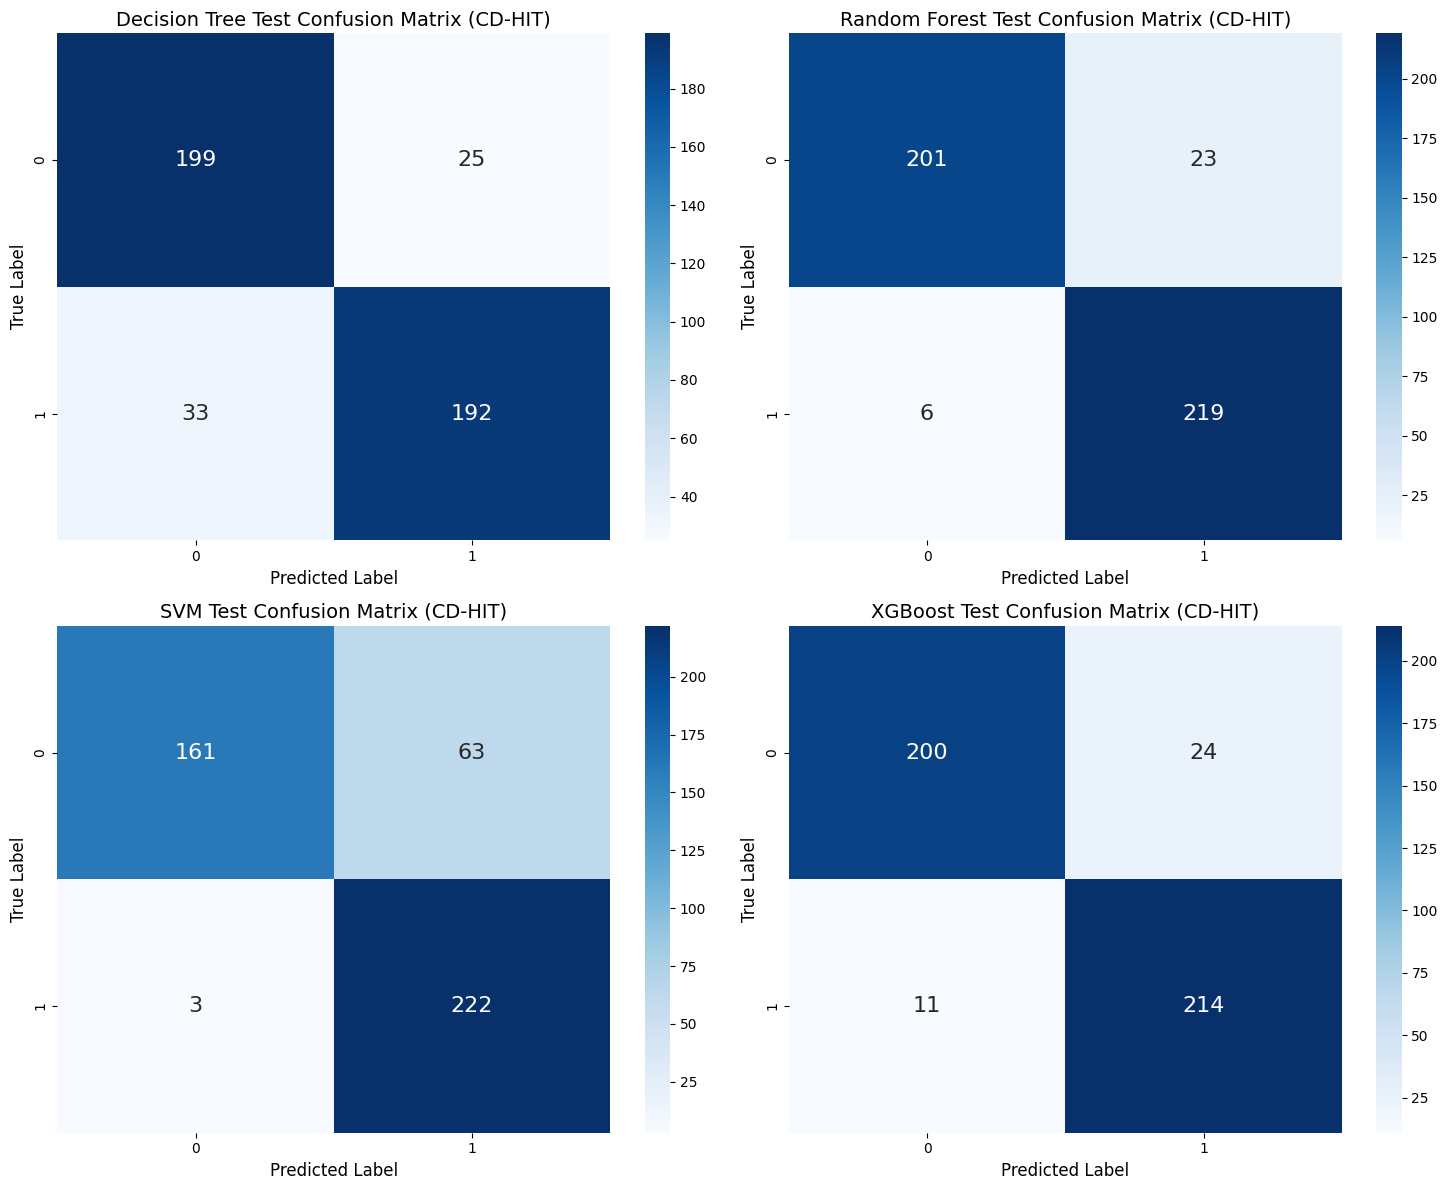

In [56]:
# Generate the confusion matrices
test_conf_matrix_dt = confusion_matrix(y_test, y_test_pred_dt)
test_conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
test_conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)
test_conf_matrix_xgb = confusion_matrix(y_test, y_test_pred_binary)

# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot the confusion matrix for Decision Tree
sns.heatmap(test_conf_matrix_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0], annot_kws={"size": 16})
axes[0, 0].set_xlabel('Predicted Label', fontsize=12)
axes[0, 0].set_ylabel('True Label', fontsize=12)
axes[0, 0].set_title('Decision Tree Test Confusion Matrix (CD-HIT)', fontsize=14)

# Plot the confusion matrix for Random Forest
sns.heatmap(test_conf_matrix_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1], annot_kws={"size": 16})
axes[0, 1].set_xlabel('Predicted Label', fontsize=12)
axes[0, 1].set_ylabel('True Label', fontsize=12)
axes[0, 1].set_title('Random Forest Test Confusion Matrix (CD-HIT)', fontsize=14)

# Plot the confusion matrix for SVM
sns.heatmap(test_conf_matrix_svm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0], annot_kws={"size": 16})
axes[1, 0].set_xlabel('Predicted Label', fontsize=12)
axes[1, 0].set_ylabel('True Label', fontsize=12)
axes[1, 0].set_title('SVM Test Confusion Matrix (CD-HIT)', fontsize=14)

# Plot the confusion matrix for XGBoost
sns.heatmap(test_conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1], annot_kws={"size": 16})
axes[1, 1].set_xlabel('Predicted Label', fontsize=12)
axes[1, 1].set_ylabel('True Label', fontsize=12)
axes[1, 1].set_title('XGBoost Test Confusion Matrix (CD-HIT)', fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## Metrics Comparison

In [29]:
# Validation set
df_metrics_val = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "SVM", "XGBoost"],
    "Accuracy": [val_accuracy_dt, val_accuracy_rf, val_accuracy_svm, val_accuracy_xgb], 
    "Precision": [val_precision_dt, val_precision_rf, val_precision_svm, val_precision_xgb], 
    "Recall": [val_recall_dt, val_recall_rf, val_recall_svm, val_recall_xgb], 
    "F1-Score": [val_f1_dt, val_f1_rf, val_f1_svm, val_f1_xgb]
}).round(2)

df_metrics_val

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.87,0.80,0.88,0.84
1,Random Forest,0.89,0.80,0.98,0.88
2,SVM,0.80,0.66,1.00,0.80
3,XGBoost,0.90,0.82,0.97,0.89


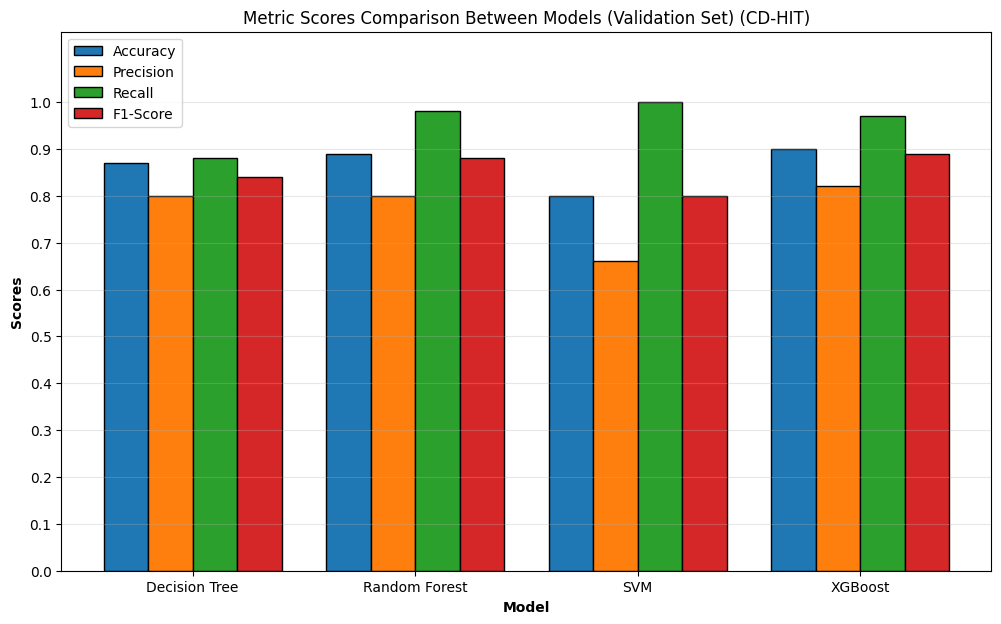

In [30]:
plt.figure(figsize=(12, 7))                                             # Set the figure size

models = df_metrics_val['Model']                                        # List of models
num_models = len(models)

bar_width = 0.2                                                         # Set the width of the bars
r = [np.arange(num_models)]                                             # Set the positions of the bars on the x-axis
for i in range(1, 4): r.append([x + bar_width for x in r[i-1]])

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']                   # Define colorblind-friendly colors
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for i, metric in enumerate(metrics):
    plt.bar(r[i], df_metrics_val[metric], color=colors[i], width=bar_width, edgecolor='black', label=metric)

plt.title('Metric Scores Comparison Between Models (Validation Set) (CD-HIT)') 
plt.xlabel('Model', fontweight='bold')                                
plt.xticks([x + 1.5 * bar_width for x in range(num_models)], models)    # X-axis ticks
plt.ylabel('Scores', fontweight='bold')                               
plt.ylim(top=df_metrics_val.drop('Model', axis=1).values.max() * 1.15)  # Y-axis limits
plt.yticks(np.arange(0, 1.1, 0.1))                                      # Y-axis ticks
plt.grid(axis='y', alpha=0.3)                                           # Y-axis grid
plt.legend(loc='upper left')                                            # Legend
plt.show()

In [31]:
# Test set
df_metrics_test = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "SVM", "XGBoost"],
    "Accuracy": [test_accuracy_dt, test_accuracy_rf, test_accuracy_svm, test_accuracy_xgb], 
    "Precision": [test_precision_dt, test_precision_rf, test_precision_svm, test_precision_xgb], 
    "Recall": [test_recall_dt, test_recall_rf, test_recall_svm, test_recall_xgb], 
    "F1-Score": [test_f1_dt, test_f1_rf, test_f1_svm, test_f1_xgb]
}).round(2)

df_metrics_test

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.87,0.88,0.85,0.87
1,Random Forest,0.94,0.90,0.97,0.94
2,SVM,0.85,0.78,0.99,0.87
3,XGBoost,0.92,0.90,0.95,0.92


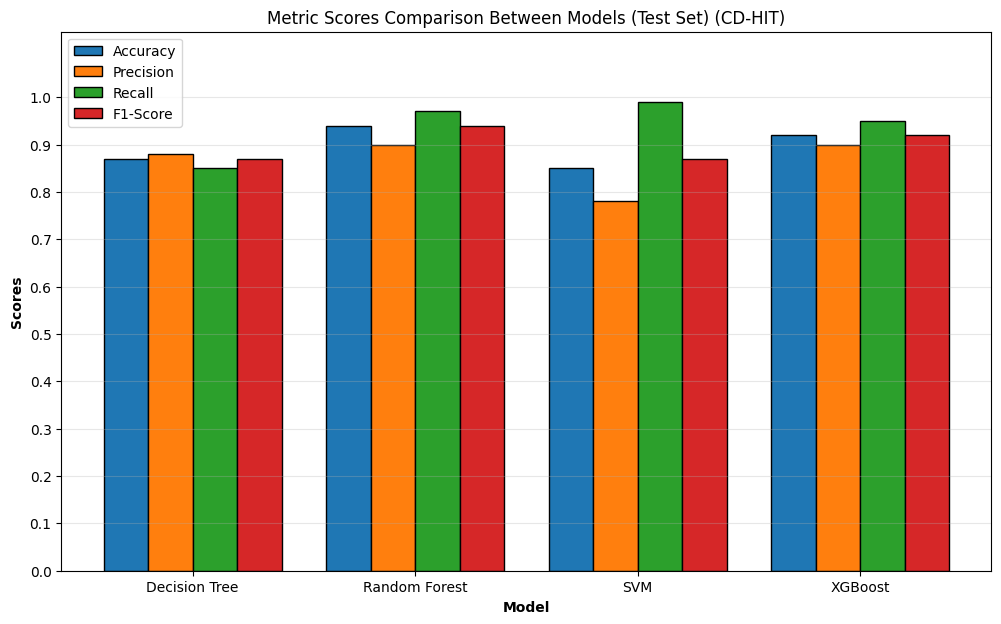

In [32]:
plt.figure(figsize=(12, 7))                                             # Set the figure size

models = df_metrics_test['Model']                                       # List of models
num_models = len(models)

bar_width = 0.2                                                         # Set the width of the bars
r = [np.arange(num_models)]                                             # Set the positions of the bars on the x-axis
for i in range(1, 4): r.append([x + bar_width for x in r[i-1]])

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']                   # Define colorblind-friendly colors
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for i, metric in enumerate(metrics):
    plt.bar(r[i], df_metrics_test[metric], color=colors[i], width=bar_width, edgecolor='black', label=metric)

plt.title('Metric Scores Comparison Between Models (Test Set) (CD-HIT)')         
plt.xlabel('Model', fontweight='bold')                                  
plt.xticks([x + 1.5 * bar_width for x in range(num_models)], models)    # X-axis ticks
plt.ylabel('Scores', fontweight='bold')                                 
plt.ylim(top=df_metrics_test.drop('Model', axis=1).values.max() * 1.15) # Y-axis limits
plt.yticks(np.arange(0, 1.1, 0.1))                                      # Y-axis ticks
plt.grid(axis='y', alpha=0.3)                                           # Y-axis grid
plt.legend(loc='upper left')                                            # Move the legend to the upper right corner
plt.show()

## Learning Curves

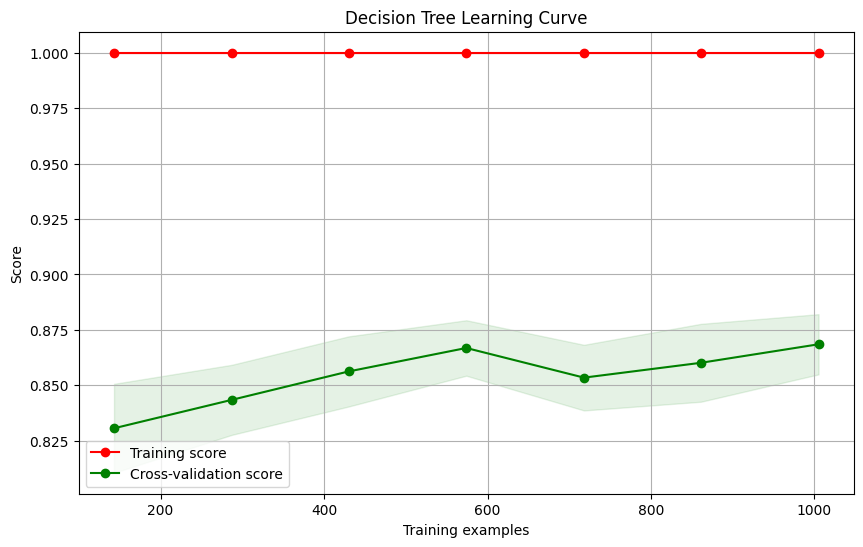

In [33]:
from sklearn.model_selection import learning_curve

# Define different training set sizes
train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

# Calculate the learning curve for Decision Tree
train_sizes_dt, train_scores_dt, val_scores_dt = learning_curve(dt_model, X_temp, y_temp, train_sizes=train_sizes, cv=5)

# Calculate mean and standard deviation of training scores
train_mean_dt = np.mean(train_scores_dt, axis=1)
train_std_dt = np.std(train_scores_dt, axis=1)

# Calculate mean and standard deviation of validation scores
val_mean_dt = np.mean(val_scores_dt, axis=1)
val_std_dt = np.std(val_scores_dt, axis=1)

# Plot the learning curve for Decision Tree
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_dt, train_mean_dt - train_std_dt, train_mean_dt + train_std_dt, alpha=0.1, color="r")
plt.fill_between(train_sizes_dt, val_mean_dt - val_std_dt, val_mean_dt + val_std_dt, alpha=0.1, color="g")
plt.plot(train_sizes_dt, train_mean_dt, 'o-', color="r", label="Training score")
plt.plot(train_sizes_dt, val_mean_dt, 'o-', color="g", label="Cross-validation score")
plt.title("Decision Tree Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

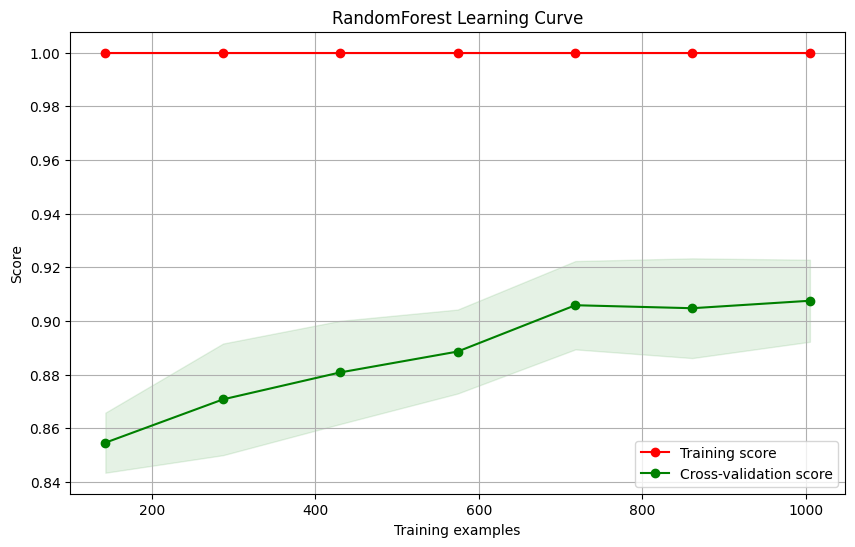

In [34]:
# Calculate the learning curve for RandomForest
train_sizes_rf, train_scores_rf, val_scores_rf = learning_curve(rf_model, X_temp, y_temp, train_sizes=train_sizes, cv=5)

# Calculate mean and standard deviation of training scores
train_mean_rf = np.mean(train_scores_rf, axis=1)
train_std_rf = np.std(train_scores_rf, axis=1)

# Calculate mean and standard deviation of validation scores
val_mean_rf = np.mean(val_scores_rf, axis=1)
val_std_rf = np.std(val_scores_rf, axis=1)

# Plot the learning curve for RandomForest
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_rf, train_mean_rf - train_std_rf, train_mean_rf + train_std_rf, alpha=0.1, color="r")
plt.fill_between(train_sizes_rf, val_mean_rf - val_std_rf, val_mean_rf + val_std_rf, alpha=0.1, color="g")
plt.plot(train_sizes_rf, train_mean_rf, 'o-', color="r", label="Training score")
plt.plot(train_sizes_rf, val_mean_rf, 'o-', color="g", label="Cross-validation score")
plt.title("RandomForest Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

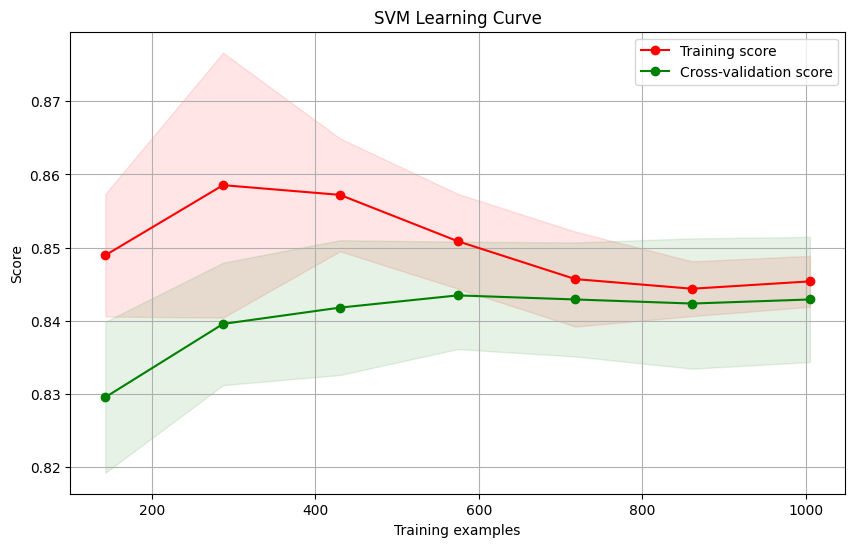

In [35]:
# Calculate the learning curve for SVM
train_sizes_svm, train_scores_svm, val_scores_svm = learning_curve(svm_model, X_temp, y_temp, train_sizes=train_sizes, cv=5)

# Calculate mean and standard deviation of training scores
train_mean_svm = np.mean(train_scores_svm, axis=1)
train_std_svm = np.std(train_scores_svm, axis=1)

# Calculate mean and standard deviation of validation scores
val_mean_svm = np.mean(val_scores_svm, axis=1)
val_std_svm = np.std(val_scores_svm, axis=1)

# Plot the learning curve for SVM
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_svm, train_mean_svm - train_std_svm, train_mean_svm + train_std_svm, alpha=0.1, color="r")
plt.fill_between(train_sizes_svm, val_mean_svm - val_std_svm, val_mean_svm + val_std_svm, alpha=0.1, color="g")
plt.plot(train_sizes_svm, train_mean_svm, 'o-', color="r", label="Training score")
plt.plot(train_sizes_svm, val_mean_svm, 'o-', color="g", label="Cross-validation score")
plt.title("SVM Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

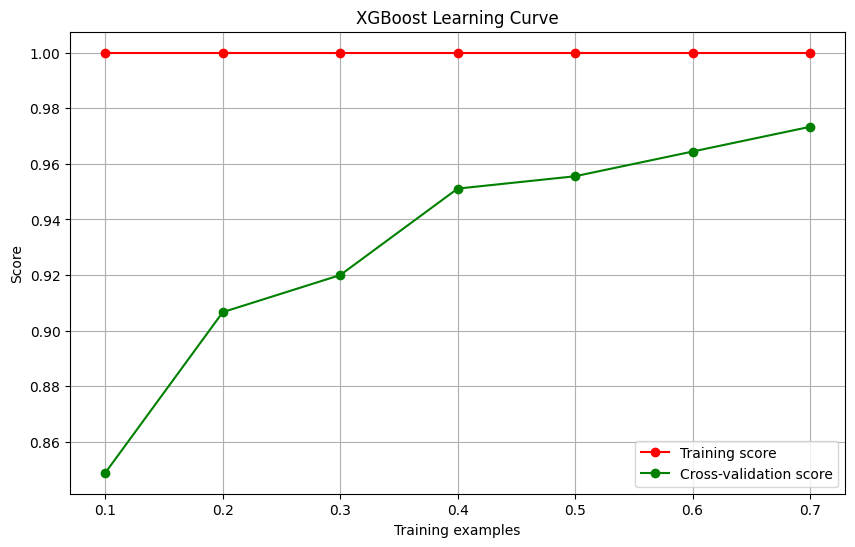

In [36]:
# Initialize lists to store training and validation scores
train_scores_xgb = []
val_scores_xgb = []

# Train XGBoost model for different training set sizes
for size in train_sizes:
    # Split the training set into subsets of the desired size
    X_train_subset = X_temp[:int(len(X_temp) * size)]
    y_train_subset = y_temp[:int(len(y_temp) * size)]
    
    # Initialize XGBClassifier
    xgb_model_subset = XGBClassifier(random_state=42)
    
    # Fit the XGBoost model
    xgb_model_subset.fit(X_train_subset, y_train_subset)
    
    # Make predictions on the training and validation sets
    y_train_pred_subset = xgb_model_subset.predict(X_train_subset)
    y_val_pred_subset = xgb_model_subset.predict(X_val)
    
    # Calculate the accuracy scores
    train_accuracy_subset = accuracy_score(y_train_subset, y_train_pred_subset)
    val_accuracy_subset = accuracy_score(y_val, y_val_pred_subset)
    
    # Append the accuracy scores to the lists
    train_scores_xgb.append(train_accuracy_subset)
    val_scores_xgb.append(val_accuracy_subset)

# Plot the learning curve for XGBoost
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_xgb, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_xgb, 'o-', color="g", label="Cross-validation score")
plt.title("XGBoost Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

## Plotting the time it takes to run each algorithm

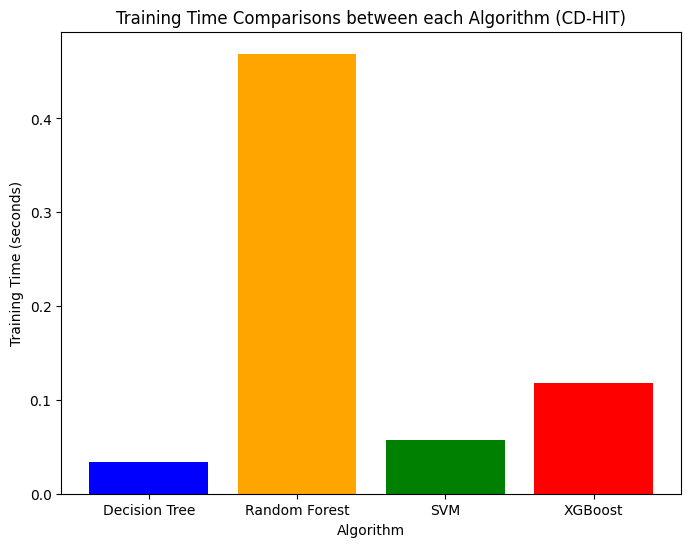

In [37]:
import time

# Initialize lists to store training times for each algorithm
training_times = []

# Train Decision Tree and measure training time
start_time = time.time()
dt_model.fit(X_train, y_train)
end_time = time.time()
training_times.append(end_time - start_time)

# Train RandomForest and measure training time
start_time = time.time()
rf_model.fit(X_train, y_train)
end_time = time.time()
training_times.append(end_time - start_time)

# Train SVM and measure training time
start_time = time.time()
svm_model.fit(X_train, y_train)
end_time = time.time()
training_times.append(end_time - start_time)

# Train XGBoost (XGBClassifier) and measure training time
start_time = time.time()
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
end_time = time.time()
training_times.append(end_time - start_time)

# Plot the training times for each algorithm
plt.figure(figsize=(8, 6))
models = ['Decision Tree', 'Random Forest', 'SVM', 'XGBoost']
plt.bar(models, training_times, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Algorithm')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparisons between each Algorithm (CD-HIT)')
plt.show()

## Hyperparameter Tuning
Involves finding the best set of hyperparameters for each ML algorithm to optimize its performance.

The codes will perform hyperparameter tuning for each algorithm using GridSearchCV, find the best set of hyperparameters, and train each model with the best hyperparameters. Then, it will evaluate the tuned models on the validation set and print the evaluation metrics.

Hyperparameter tuning for SVM can be computationally expensive, especially for large datasets. So we will be skipping it (leaving it at default).

### Hyperparameter Tuning for Decision Tree:

In [38]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid for Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy')

# Perform GridSearchCV
grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters
best_params_dt = grid_search_dt.best_params_

# Initialize Decision Tree classifier with best hyperparameters
best_dt_model = DecisionTreeClassifier(random_state=42, **best_params_dt)

# Train the Decision Tree classifier with best hyperparameters
best_dt_model.fit(X_train, y_train)

## VALIDATION SET
# Make predictions on the validation set
y_val_pred_dt_tuned = best_dt_model.predict(X_val)

# Calculate evaluation metrics for the validation set
val_accuracy_dt_tuned = accuracy_score(y_val, y_val_pred_dt_tuned)
val_precision_dt_tuned = precision_score(y_val, y_val_pred_dt_tuned)
val_recall_dt_tuned = recall_score(y_val, y_val_pred_dt_tuned)
val_f1_dt_tuned = f1_score(y_val, y_val_pred_dt_tuned)

# Print the evaluation metrics for tuned Decision Tree and compare with the original metrics
print("Decision Tree Validation Set Default Parameters vs Hyperparameter Tuning (CD-HIT) \n")
df_metrics_dt_val_tuned = pd.DataFrame({
    "Parameters": ["Default", "Tuned"],
    "Accuracy": [val_accuracy_dt, val_accuracy_dt_tuned], 
    "Precision": [val_precision_dt, val_precision_dt_tuned], 
    "Recall": [val_recall_dt, val_recall_dt_tuned], 
    "F1-Score": [val_f1_dt, val_f1_dt_tuned]
}).round(2)

print(df_metrics_dt_val_tuned, "\n\n")

## TEST SET
# Make predictions on the test set
y_test_pred_dt_tuned = best_dt_model.predict(X_test)

# Calculate evaluation metrics for the test set
test_accuracy_dt_tuned = accuracy_score(y_test, y_test_pred_dt_tuned)
test_precision_dt_tuned = precision_score(y_test, y_test_pred_dt_tuned)
test_recall_dt_tuned = recall_score(y_test, y_test_pred_dt_tuned)
test_f1_dt_tuned = f1_score(y_test, y_test_pred_dt_tuned)

# Print the evaluation metrics for tuned Decision Tree and compare with the original metrics
print("Decision Tree Test Set Default Parameters vs Hyperparameter Tuning (CD-HIT) \n")
df_metrics_dt_test_tuned = pd.DataFrame({
    "Parameters": ["Default", "Tuned"],
    "Accuracy": [test_accuracy_dt, test_accuracy_dt_tuned], 
    "Precision": [test_precision_dt, test_precision_dt_tuned], 
    "Recall": [test_recall_dt, test_recall_dt_tuned], 
    "F1-Score": [test_f1_dt, test_f1_dt_tuned]
}).round(2)

print(df_metrics_dt_test_tuned)

Decision Tree Validation Set Default Parameters vs Hyperparameter Tuning (CD-HIT) 

  Parameters  Accuracy  Precision  Recall  F1-Score
0    Default      0.87       0.80    0.88      0.84
1      Tuned      0.89       0.84    0.91      0.87 


Decision Tree Test Set Default Parameters vs Hyperparameter Tuning (CD-HIT) 

  Parameters  Accuracy  Precision  Recall  F1-Score
0    Default      0.87       0.88    0.85      0.87
1      Tuned      0.86       0.86    0.87      0.86


#### Decision Tree Confusion Matrix (Tuned)

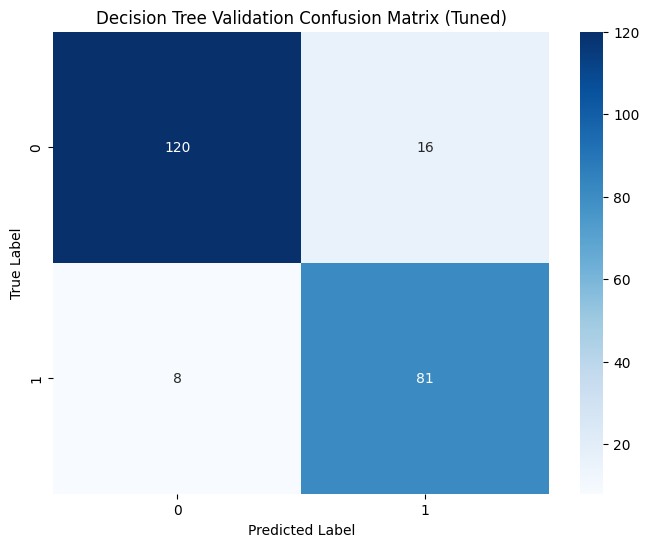

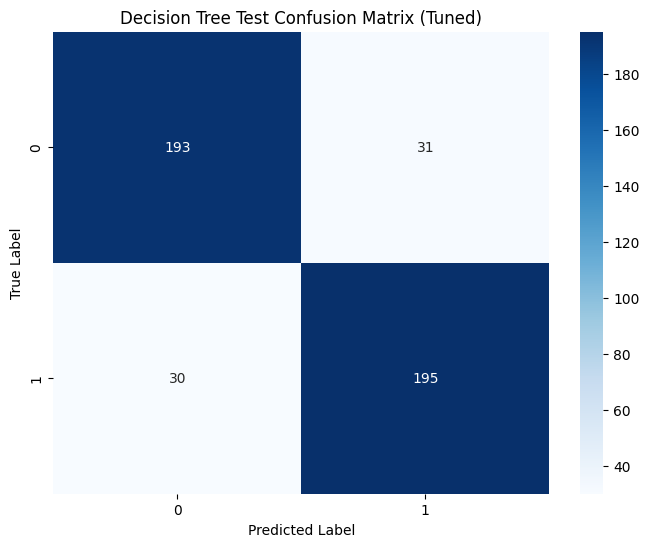

In [39]:
# Generate the confusion matrix for the validation set with tuned hyperparameters
val_conf_matrix_dt_tuned = confusion_matrix(y_val, y_val_pred_dt_tuned)

# Plot the confusion matrix for the validation set
plt.figure(figsize=(8, 6))
sns.heatmap(val_conf_matrix_dt_tuned, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Validation Confusion Matrix (Tuned)')
plt.show()

# Generate the confusion matrix for the test set with tuned hyperparameters
test_conf_matrix_dt_tuned = confusion_matrix(y_test, y_test_pred_dt_tuned)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix_dt_tuned, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Test Confusion Matrix (Tuned)')
plt.show()

### Hyperparameter Tuning for RandomForest:

In [40]:
# Define the hyperparameters grid for RandomForest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for RandomForest
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')

# Perform GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_

# Initialize RandomForest classifier with best hyperparameters
best_rf_model = RandomForestClassifier(random_state=42, **best_params_rf)

# Train the RandomForest classifier with best hyperparameters
best_rf_model.fit(X_train, y_train)

## VALIDATION SET
# Make predictions on the validation set
y_val_pred_rf_tuned = best_rf_model.predict(X_val)

# Calculate evaluation metrics for the validation set
val_accuracy_rf_tuned = accuracy_score(y_val, y_val_pred_rf_tuned)
val_precision_rf_tuned = precision_score(y_val, y_val_pred_rf_tuned)
val_recall_rf_tuned = recall_score(y_val, y_val_pred_rf_tuned)
val_f1_rf_tuned = f1_score(y_val, y_val_pred_rf_tuned)

# Print the evaluation metrics for tuned Random Forest and compare with the original metrics
print("RandomForest Validation Set Default Parameters vs Hyperparameter Tuning (CD-HIT) \n")
df_metrics_rf_val_tuned = pd.DataFrame({
    "Parameters": ["Default", "Tuned"],
    "Accuracy": [val_accuracy_rf, val_accuracy_rf_tuned], 
    "Precision": [val_precision_rf, val_precision_rf_tuned], 
    "Recall": [val_recall_rf, val_recall_rf_tuned], 
    "F1-Score": [val_f1_rf, val_f1_rf_tuned]
}).round(2)

print(df_metrics_rf_val_tuned, "\n\n")

## TEST SET
# Make predictions on the test set
y_test_pred_rf_tuned = best_rf_model.predict(X_test)

# Calculate evaluation metrics for the test set
test_accuracy_rf_tuned = accuracy_score(y_test, y_test_pred_rf_tuned)
test_precision_rf_tuned = precision_score(y_test, y_test_pred_rf_tuned)
test_recall_rf_tuned = recall_score(y_test, y_test_pred_rf_tuned)
test_f1_rf_tuned = f1_score(y_test, y_test_pred_rf_tuned)

# Print the evaluation metrics for tuned Random Forest and compare with the original metrics
print("RandomForest Test Set Default Parameters vs Hyperparameter Tuning (CD-HIT) \n")
df_metrics_rf_test_tuned = pd.DataFrame({
    "Parameters": ["Default", "Tuned"],
    "Accuracy": [test_accuracy_rf, test_accuracy_rf_tuned], 
    "Precision": [test_precision_rf, test_precision_rf_tuned], 
    "Recall": [test_recall_rf, test_recall_rf_tuned], 
    "F1-Score": [test_f1_rf, test_f1_rf_tuned]
}).round(2)

print(df_metrics_rf_test_tuned)

RandomForest Validation Set Default Parameters vs Hyperparameter Tuning (CD-HIT) 

  Parameters  Accuracy  Precision  Recall  F1-Score
0    Default      0.89       0.80    0.98      0.88
1      Tuned      0.91       0.81    0.99      0.89 


RandomForest Test Set Default Parameters vs Hyperparameter Tuning (CD-HIT) 

  Parameters  Accuracy  Precision  Recall  F1-Score
0    Default      0.94       0.90    0.97      0.94
1      Tuned      0.93       0.89    0.97      0.93


#### RandomForest Confusion Matrix (Tuned)

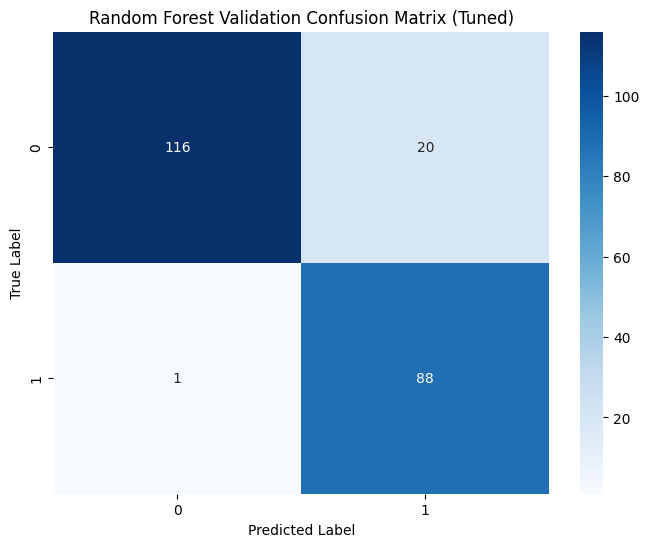

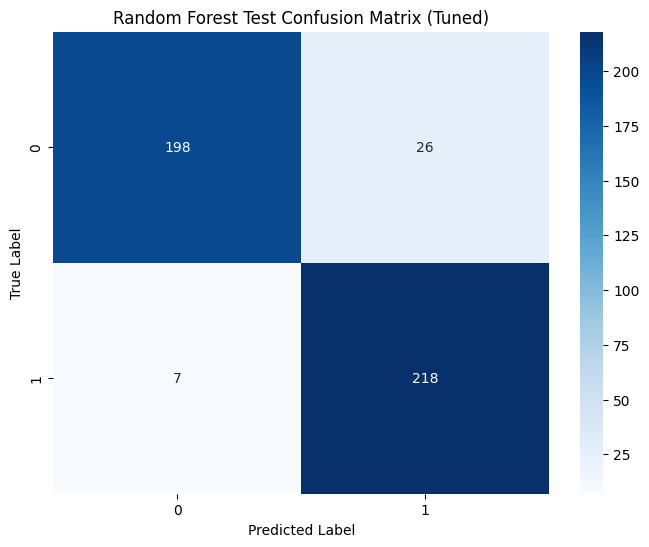

In [41]:
# Generate the confusion matrix for the validation set with tuned hyperparameters
val_conf_matrix_rf_tuned = confusion_matrix(y_val, y_val_pred_rf_tuned)

# Plot the confusion matrix for the validation set
plt.figure(figsize=(8, 6))
sns.heatmap(val_conf_matrix_rf_tuned, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Validation Confusion Matrix (Tuned)')
plt.show()

# Generate the confusion matrix for the test set with tuned hyperparameters
test_conf_matrix_rf_tuned = confusion_matrix(y_test, y_test_pred_rf_tuned)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix_rf_tuned, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Test Confusion Matrix (Tuned)')
plt.show()

### Hyperparameter Tuning for SVM:

In [42]:
# Define the hyperparameters grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100, 1000],                   
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],         
    'kernel': ['rbf']                            # Other Kernels: 'linear', 'rbf', 'poly' and 'sigmoid'; to note: only 'rbf' provides actual results for this dataset
}

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, refit = True, verbose = 3) 

# Perform GridSearchCV
grid_search_svm.fit(X_train, y_train)

# Get the best hyperparameters
best_params_svm = grid_search_svm.best_params_
print(best_params_svm)

# Initialize SVM with best hyperparameters
best_svm_model = grid_search_svm.best_estimator_
print(best_svm_model)

# Train SVM with best hyperparameters
best_svm_model.fit(X_train, y_train)

## VALIDATION SET
# Make predictions on the validation set
y_val_pred_svm_tuned = best_svm_model.predict(X_val)

# Calculate evaluation metrics for the validation set
val_accuracy_svm_tuned = accuracy_score(y_val, y_val_pred_svm_tuned)
val_precision_svm_tuned = precision_score(y_val, y_val_pred_svm_tuned)
val_recall_svm_tuned = recall_score(y_val, y_val_pred_svm_tuned)
val_f1_svm_tuned = f1_score(y_val, y_val_pred_svm_tuned)

# Print the evaluation metrics for tuned Random Forest and compare with the original metrics
print("SVM Validation Set Default Parameters vs Hyperparameter Tuning (CD-HIT) \n")
df_metrics_svm_val_tuned = pd.DataFrame({
    "Parameters": ["Default", "Tuned"],
    "Accuracy": [val_accuracy_svm, val_accuracy_svm_tuned], 
    "Precision": [val_precision_svm, val_precision_svm_tuned], 
    "Recall": [val_recall_svm, val_recall_svm_tuned], 
    "F1-Score": [val_f1_svm, val_f1_svm_tuned]
}).round(2)

print(df_metrics_svm_val_tuned, "\n\n")

## TEST SET
# Make predictions on the test set
y_test_pred_svm_tuned = best_svm_model.predict(X_test)

# Calculate evaluation metrics for the test set
test_accuracy_svm_tuned = accuracy_score(y_test, y_test_pred_svm_tuned)
test_precision_svm_tuned = precision_score(y_test, y_test_pred_svm_tuned)
test_recall_svm_tuned = recall_score(y_test, y_test_pred_svm_tuned)
test_f1_svm_tuned = f1_score(y_test, y_test_pred_svm_tuned)

# Print the evaluation metrics for tuned Random Forest and compare with the original metrics
print("SVM Test Set Default Parameters vs Hyperparameter Tuning (CD-HIT) \n")
df_metrics_svm_test_tuned = pd.DataFrame({
    "Parameters": ["Default", "Tuned"],
    "Accuracy": [test_accuracy_svm, test_accuracy_svm_tuned], 
    "Precision": [test_precision_svm, test_precision_svm_tuned], 
    "Recall": [test_recall_svm, test_recall_svm_tuned], 
    "F1-Score": [test_f1_svm, test_f1_svm_tuned]
}).round(2)

print(df_metrics_svm_test_tuned)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.516 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.516 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.516 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.513 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.513 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.516 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.516 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.516 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.513 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.513 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.516 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

#### SVM Confusion Matrix (Tuned)

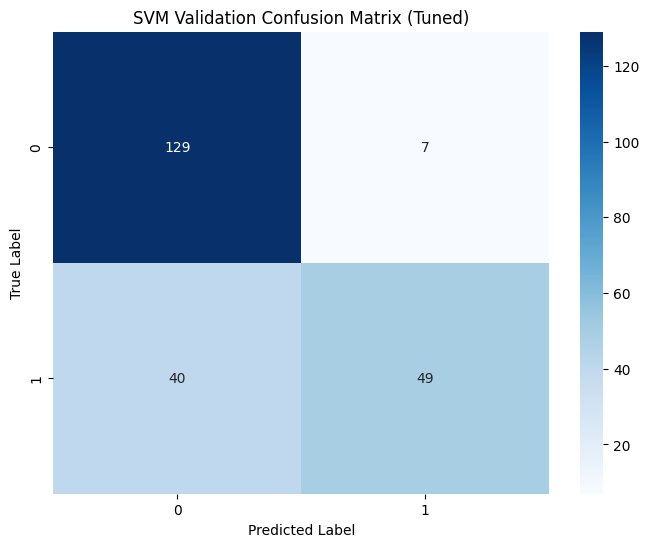

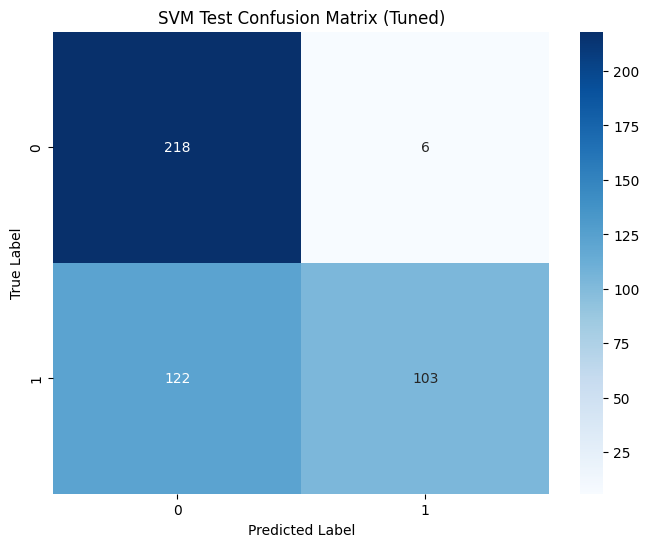

In [43]:
# Generate the confusion matrix for the validation set with tuned hyperparameters
val_conf_matrix_svm_tuned = confusion_matrix(y_val, y_val_pred_svm_tuned)

# Plot the confusion matrix for the validation set
plt.figure(figsize=(8, 6))
sns.heatmap(val_conf_matrix_svm_tuned, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Validation Confusion Matrix (Tuned)')
plt.show()

# Generate the confusion matrix for the test set with tuned hyperparameters
test_conf_matrix_svm_tuned = confusion_matrix(y_test, y_test_pred_svm_tuned)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix_svm_tuned, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Test Confusion Matrix (Tuned)')
plt.show()

### Hyperparameter Tuning for XGBoost:

In [44]:
# Define the hyperparameters grid for XGBoost
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss'), param_grid_xgb, cv=5, scoring='accuracy')

# Perform GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters
best_params_xgb = grid_search_xgb.best_params_

# Initialize XGBoost classifier with best hyperparameters
best_xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', **best_params_xgb)

# Train the XGBoost classifier with best hyperparameters
best_xgb_model.fit(X_train, y_train)

## VALIDATION SET
# Make predictions on the validation set
y_val_pred_xgb_tuned = best_xgb_model.predict(X_val)

# Calculate evaluation metrics for the validation set
val_accuracy_xgb_tuned = accuracy_score(y_val, y_val_pred_xgb_tuned)
val_precision_xgb_tuned = precision_score(y_val, y_val_pred_xgb_tuned)
val_recall_xgb_tuned = recall_score(y_val, y_val_pred_xgb_tuned)
val_f1_xgb_tuned = f1_score(y_val, y_val_pred_xgb_tuned)

# Print the evaluation metrics for tuned XGBoost and compare with the original metrics
print("XGBoost Validation Set Default Parameters vs Hyperparameter Tuning (CD-HIT) \n")
df_metrics_xgb_val_tuned = pd.DataFrame({
    "Parameters": ["Default", "Tuned"],
    "Accuracy": [val_accuracy_xgb, val_accuracy_xgb_tuned], 
    "Precision": [val_precision_xgb, val_precision_xgb_tuned], 
    "Recall": [val_recall_xgb, val_recall_xgb_tuned], 
    "F1-Score": [val_f1_xgb, val_f1_xgb_tuned]
}).round(2)

print(df_metrics_xgb_val_tuned, "\n\n")

## TEST SET
# Make predictions on the test set
y_test_pred_xgb_tuned = best_xgb_model.predict(X_test)

# Calculate evaluation metrics for the test set
test_accuracy_xgb_tuned = accuracy_score(y_test, y_test_pred_xgb_tuned)
test_precision_xgb_tuned = precision_score(y_test, y_test_pred_xgb_tuned)
test_recall_xgb_tuned = recall_score(y_test, y_test_pred_xgb_tuned)
test_f1_xgb_tuned = f1_score(y_test, y_test_pred_xgb_tuned)

# Print the evaluation metrics for tuned XGBoost and compare with the original metrics
print("XGBoost Test Set Default Parameters vs Hyperparameter Tuning (CD-HIT) \n")
df_metrics_xgb_test_tuned = pd.DataFrame({
    "Parameters": ["Default", "Tuned"],
    "Accuracy": [test_accuracy_xgb, test_accuracy_xgb_tuned], 
    "Precision": [test_precision_xgb, test_precision_xgb_tuned], 
    "Recall": [test_recall_xgb, test_recall_xgb_tuned], 
    "F1-Score": [test_f1_xgb, test_f1_xgb_tuned]
}).round(2)

print(df_metrics_xgb_test_tuned)

XGBoost Validation Set Default Parameters vs Hyperparameter Tuning (CD-HIT) 

  Parameters  Accuracy  Precision  Recall  F1-Score
0    Default      0.90       0.82    0.97      0.89
1      Tuned      0.91       0.83    0.97      0.89 


XGBoost Test Set Default Parameters vs Hyperparameter Tuning (CD-HIT) 

  Parameters  Accuracy  Precision  Recall  F1-Score
0    Default      0.92       0.90    0.95      0.92
1      Tuned      0.92       0.89    0.96      0.92


#### XGBoost Confusion Matrix (Tuned)

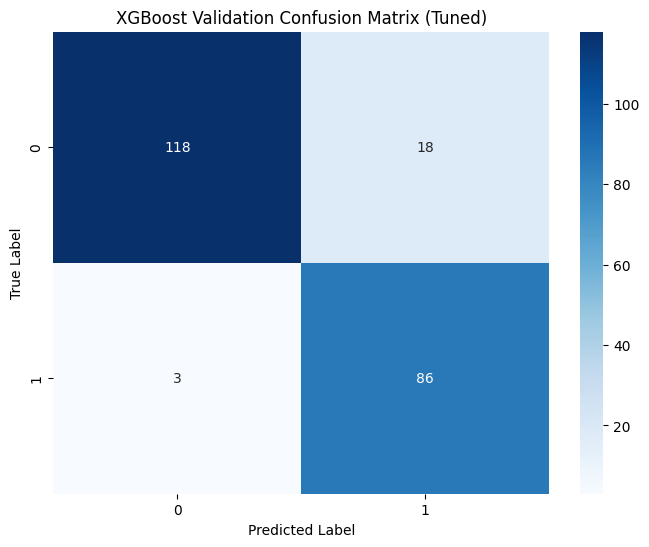

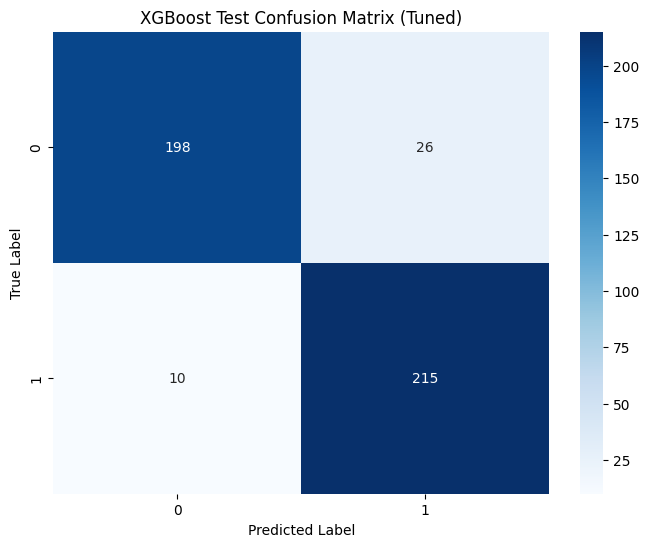

In [45]:
# Generate the confusion matrix for the validation set with tuned hyperparameters
val_conf_matrix_xgb_tuned = confusion_matrix(y_val, y_val_pred_xgb_tuned)

# Plot the confusion matrix for the validation set
plt.figure(figsize=(8, 6))
sns.heatmap(val_conf_matrix_xgb_tuned, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost Validation Confusion Matrix (Tuned)')
plt.show()

# Generate the confusion matrix for the test set with tuned hyperparameters
test_conf_matrix_xgb_tuned = confusion_matrix(y_test, y_test_pred_xgb_tuned)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix_xgb_tuned, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost Test Confusion Matrix (Tuned)')
plt.show()

## Combined Confusion Matrices with Hyperparameter Tuning

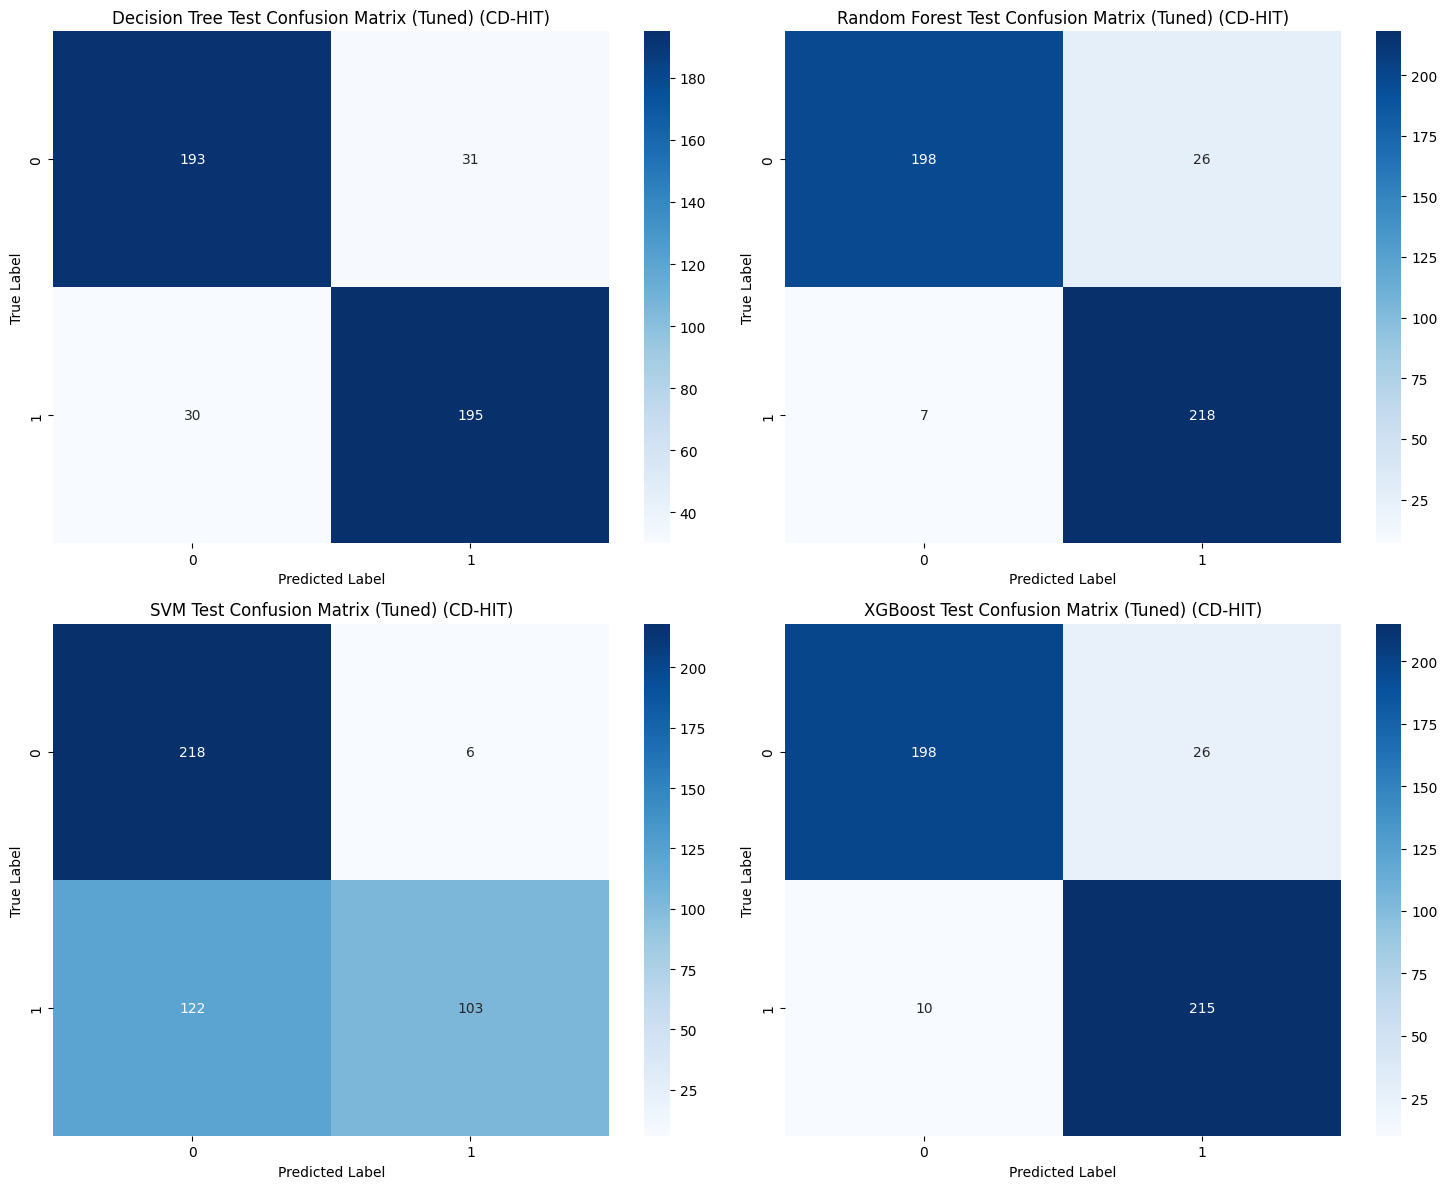

In [46]:
# Generate confusion matrices for each model's test set predictions
conf_matrix_dt = confusion_matrix(y_test, y_test_pred_dt_tuned)
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf_tuned)
conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm_tuned)
conf_matrix_xgb = confusion_matrix(y_test, y_test_pred_xgb_tuned)

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot confusion matrix for Decision Tree
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Decision Tree Test Confusion Matrix (Tuned) (CD-HIT)')
axes[0, 0].set_xlabel('Predicted Label')
axes[0, 0].set_ylabel('True Label')

# Plot confusion matrix for Random Forest
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Random Forest Test Confusion Matrix (Tuned) (CD-HIT)')
axes[0, 1].set_xlabel('Predicted Label')
axes[0, 1].set_ylabel('True Label')

# Plot confusion matrix for SVM
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('SVM Test Confusion Matrix (Tuned) (CD-HIT)')
axes[1, 0].set_xlabel('Predicted Label')
axes[1, 0].set_ylabel('True Label')

# Plot confusion matrix for XGBoost
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('XGBoost Test Confusion Matrix (Tuned) (CD-HIT)')
axes[1, 1].set_xlabel('Predicted Label')
axes[1, 1].set_ylabel('True Label')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Combined Default Parameters vs Hyperparameter Tuning

In [47]:
print("Model Default Parameters Metrics Table for Validation Set:")

# Define a dictionary to map model names to their corresponding DataFrames
model_names = {
    "Decision Tree": df_metrics_dt_val_tuned,
    "Random Forest": df_metrics_rf_val_tuned,
    "SVM": df_metrics_svm_val_tuned,
    "XGBoost": df_metrics_xgb_val_tuned
}

# Concatenate the dataframes and replace "Default" with model names in the "Parameters" column
df_parameters_default_val = pd.concat([
    df[df["Parameters"] == "Default"].assign(Parameters=model_name) 
    for model_name, df in model_names.items()
], ignore_index=True)

df_parameters_default_val

Model Default Parameters Metrics Table for Validation Set:


,Parameters,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.87,0.80,0.88,0.84
1,Random Forest,0.89,0.80,0.98,0.88
2,SVM,0.80,0.66,1.00,0.80
3,XGBoost,0.90,0.82,0.97,0.89


In [48]:
print("Model Hyperparameter Tuning Metrics Table for Validation Set:")

# Define a dictionary to map model names to their corresponding DataFrames
model_names = {
    "Decision Tree": df_metrics_dt_val_tuned,
    "Random Forest": df_metrics_rf_val_tuned,
    "SVM": df_metrics_svm_val_tuned,
    "XGBoost": df_metrics_xgb_val_tuned
}

# Concatenate the dataframes and replace "Default" with model names in the "Parameters" column
df_parameters_tuned_val = pd.concat([
    df[df["Parameters"] == "Tuned"].assign(Parameters=model_name) 
    for model_name, df in model_names.items()
], ignore_index=True)

df_parameters_tuned_val

Model Hyperparameter Tuning Metrics Table for Validation Set:


,Parameters,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.89,0.84,0.91,0.87
1,Random Forest,0.91,0.81,0.99,0.89
2,SVM,0.79,0.88,0.55,0.68
3,XGBoost,0.91,0.83,0.97,0.89


In [49]:
print("Model Default Parameters Metrics Table for Test Set:")

# Define a dictionary to map model names to their corresponding DataFrames
model_names = {
    "Decision Tree": df_metrics_dt_test_tuned,
    "Random Forest": df_metrics_rf_test_tuned,
    "SVM": df_metrics_svm_test_tuned,
    "XGBoost": df_metrics_xgb_test_tuned
}

# Concatenate the dataframes and replace "Default" with model names in the "Parameters" column
df_parameters_default_test = pd.concat([
    df[df["Parameters"] == "Default"].assign(Parameters=model_name) 
    for model_name, df in model_names.items()
], ignore_index=True)

df_parameters_default_test

Model Default Parameters Metrics Table for Test Set:


,Parameters,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.87,0.88,0.85,0.87
1,Random Forest,0.94,0.90,0.97,0.94
2,SVM,0.85,0.78,0.99,0.87
3,XGBoost,0.92,0.90,0.95,0.92


In [50]:
print("Model Hyperparameter Tuning Metrics Table for Test Set:")

# Define a dictionary to map model names to their corresponding DataFrames
model_names = {
    "Decision Tree": df_metrics_dt_test_tuned,
    "Random Forest": df_metrics_rf_test_tuned,
    "SVM": df_metrics_svm_test_tuned,
    "XGBoost": df_metrics_xgb_test_tuned
}

# Concatenate the dataframes and replace "Default" with model names in the "Parameters" column
df_parameters_tuned_test = pd.concat([
    df[df["Parameters"] == "Tuned"].assign(Parameters=model_name) 
    for model_name, df in model_names.items()
], ignore_index=True)

df_parameters_tuned_test

Model Hyperparameter Tuning Metrics Table for Test Set:


,Parameters,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.86,0.86,0.87,0.86
1,Random Forest,0.93,0.89,0.97,0.93
2,SVM,0.71,0.94,0.46,0.62
3,XGBoost,0.92,0.89,0.96,0.92


### Barplot of Hyperparameter Tuned Metrics

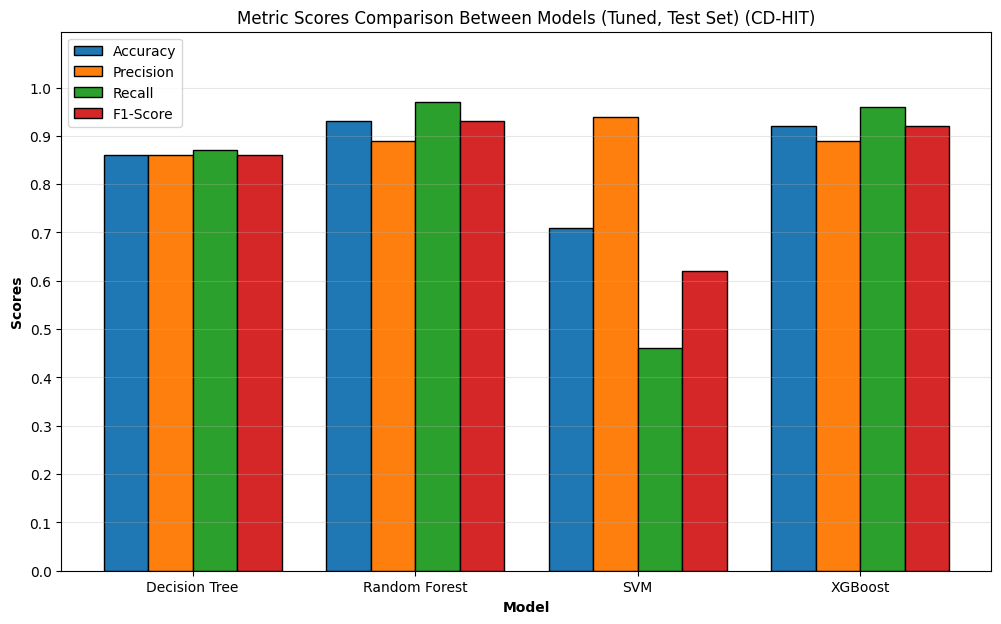

In [51]:
plt.figure(figsize=(12, 7))  # Set the figure size

# Extract the models and metrics from the DataFrame
models = df_parameters_tuned_test['Parameters']
num_models = len(models)

bar_width = 0.2  # Set the width of the bars

# Set the positions of the bars on the x-axis
r = [np.arange(num_models)]
for i in range(1, 4):
    r.append([x + bar_width for x in r[i-1]])

# Define colorblind-friendly colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot bars for each metric using colorblind-friendly colors
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for i, metric in enumerate(metrics):
    plt.bar(r[i], df_parameters_tuned_test[metric], color=colors[i], width=bar_width, edgecolor='black', label=metric)

# Plot
plt.title('Metric Scores Comparison Between Models (Tuned, Test Set) (CD-HIT)')
plt.xlabel('Model', fontweight='bold')
plt.xticks([x + 1.5 * bar_width for x in range(num_models)], models)                    # Add xticks on the middle of the group bars
plt.ylabel('Scores', fontweight='bold')
plt.ylim(top=df_parameters_tuned_test.drop('Parameters', axis=1).values.max() * 1.15)   # Set y-axis limits with some additional space at the top
plt.yticks(np.arange(0, 1.1, 0.1))  # Y-axis ticks
plt.grid(axis='y', alpha=0.3)       # Add faint grid lines only on the y-axis with 0.1 interval
plt.legend(loc='upper left')        # Move the legend to the upper right corner
plt.show()

_____________

# Clustering

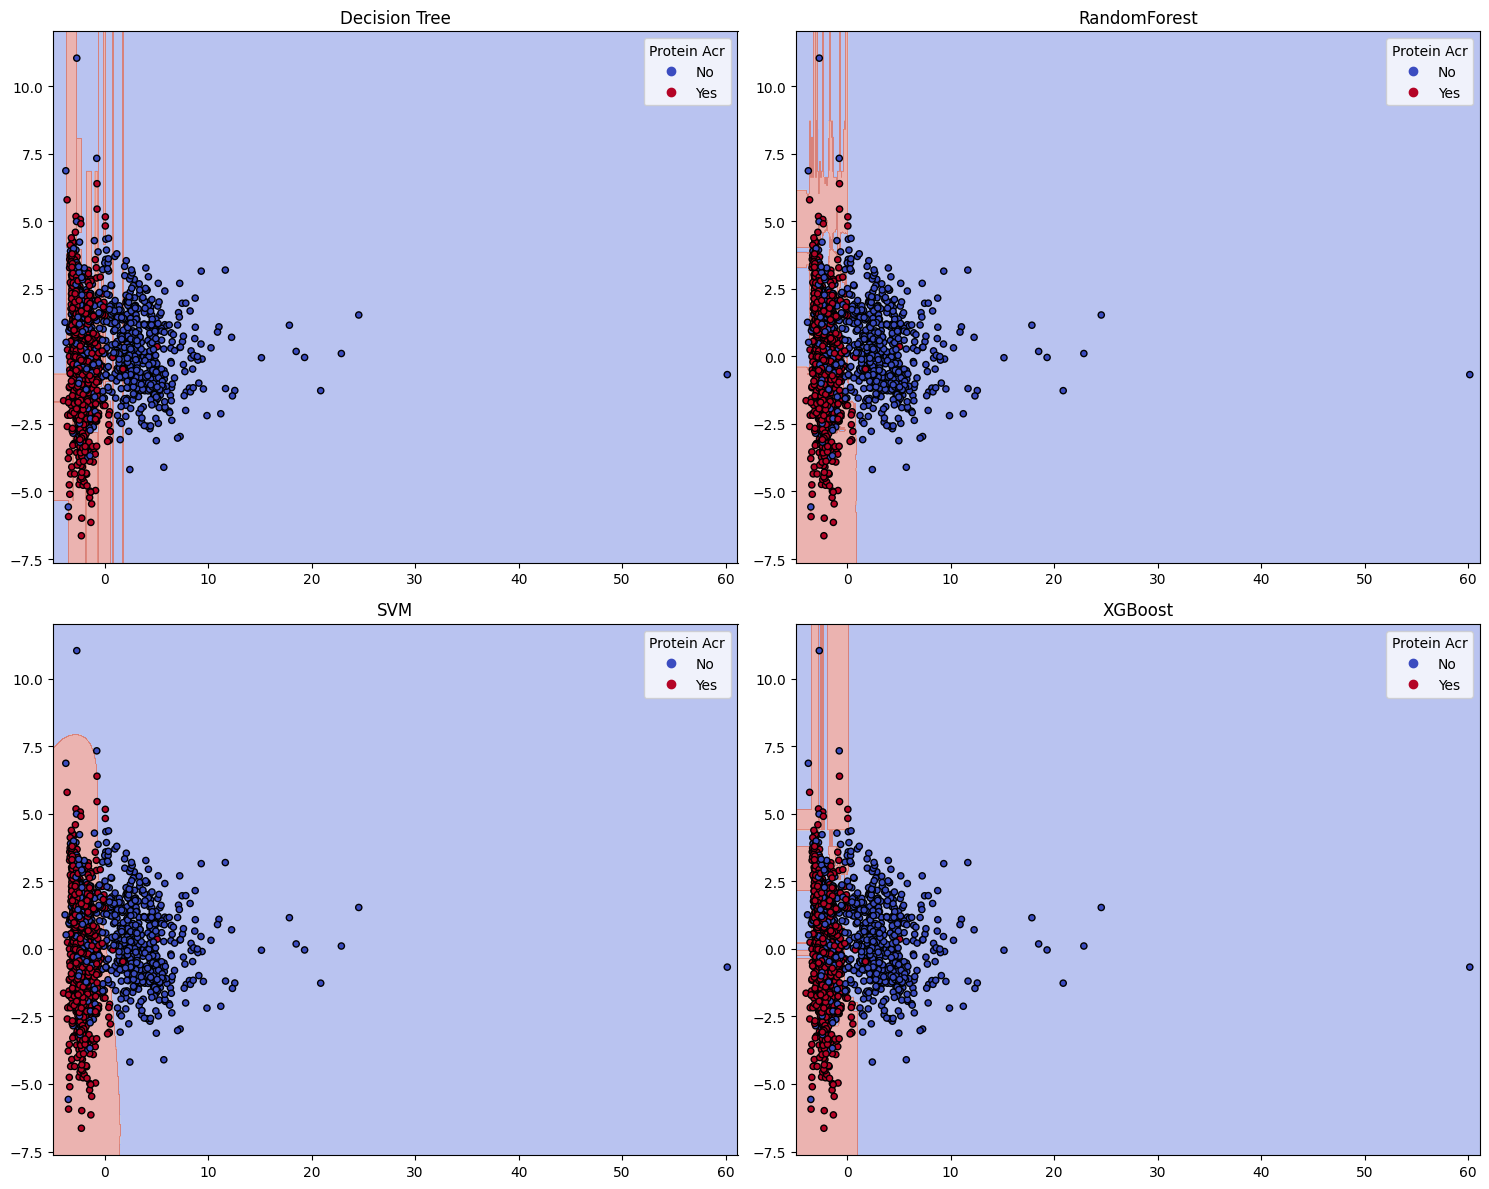

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# X_train, X_val, X_test, y_train, y_val, y_test have already been split much earlier
# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize and train models
models = {
    'Decision Tree': dt_model, 
    'RandomForest': rf_model, 
    'SVM': svm_model, 
    'XGBoost': xgb_model
}

for name, model in models.items():
    model.fit(X_train_pca, y_train)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, ax, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.coolwarm)
    ax.set_title(title)
    return scatter

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
model_titles = list(models.keys())
axes = axes.ravel()

for idx, (name, model) in enumerate(models.items()):
    scatter = plot_decision_boundaries(X_train_pca, y_train, model, axes[idx], name)
    handles, labels = scatter.legend_elements(prop="colors")
    axes[idx].legend(handles, ["No", "Yes"], title="Protein Acr")

plt.tight_layout()
plt.show()

### Hypertuned Parameters

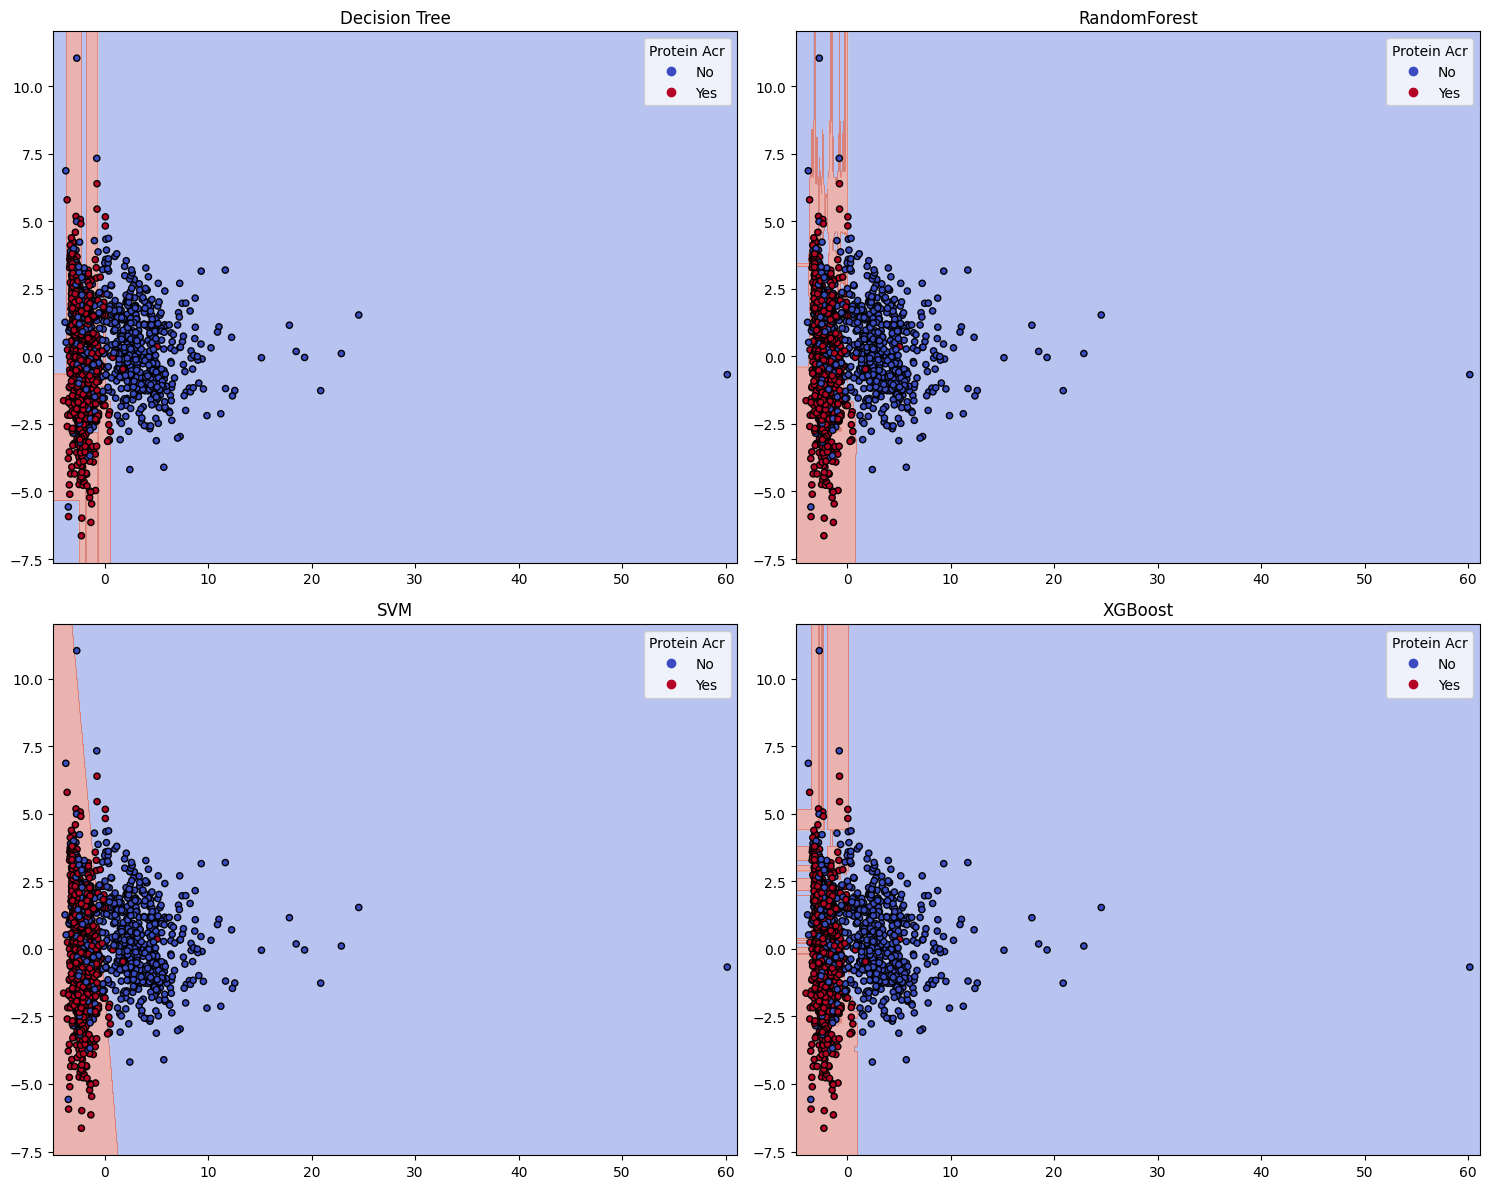

In [53]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# X_train, X_val, X_test, y_train, y_val, y_test have already been split much earlier
# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Hyperparameter-tuned models
models = {
    'Decision Tree': best_dt_model, 
    'RandomForest': best_rf_model, 
    'SVM': best_svm_model, 
    'XGBoost': best_xgb_model
}

for name, model in models.items():
    model.fit(X_train_pca, y_train)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, ax, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.coolwarm)
    ax.set_title(title)
    return scatter

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
model_titles = list(models.keys())
axes = axes.ravel()

for idx, (name, model) in enumerate(models.items()):
    scatter = plot_decision_boundaries(X_train_pca, y_train, model, axes[idx], name)
    handles, labels = scatter.legend_elements(prop="colors")
    axes[idx].legend(handles, ["No", "Yes"], title="Protein Acr")

plt.tight_layout()
plt.show()